TODO :
- Rerun EDA for binarized MRS (?) 
- Volumetric plots for 6 different groups (analyze) -discuss the plots

DONE : 
- Define categorical variables as categorical 
- Remove scatterplots (?) 
- Binarize MRS
- Change plot sizes and plot multiple plots in a grid for each feature group 
- Perform MRMR for feature selection



@Alihan26 

Based on the csv file, i want to do some simple analysis

1. Is the Age and the BMI of the patient related to the severity of the lesion?
The first data we're looking at is age, bmi, nihs score (which is the severity of the stroke 0-42), 
and the gs_rankin_6isdeath (which is the severity of the lesion 3 months after the stroke 1-6).

2. [TO-DO] What's the most common location of the lesion?
Look at those locations, and find out which of them had bigger problems, so that 
we can predict the severity of the lesion based on the location of the lesion.

I added etiology and priorstroke in the Clinical Features analysis. 
I am splitting the EDA into clinical and volumetric EDA. For that i need to define clinical_features and volumetric_features and conduct EDA separately. I suggest to analyze all features before defining the columns of interest, as they will be decided by the correlation matrix and MRMR algorithm. 

@jul-des 

Where can we find metadata, which column describes what ?

Should we remove outliers in the BMI column (>60,80 115 or empty cells) ?

I don't know if scatterplots make sense or bring any relevant information.

Does it make sense to plot all variables or maybe perform the mrmr first ?

Do we only get ischemic stroke patients, no healthy volunnteers ? 

It doesn't make sense to plot acuteischemicstroke as it is always ==1.

How is sex varibale defined : male ==1, female ==0 or viceversa ?

Should we perform EDA on 6-scale mrs or binarized ? Or both ?  

Volumetric features are too many to visualize in a correlation matrix. I suggest to split them into groups : 

Group 1: Global Lesion Metrics
Total volume (direct) Number of lesions Portion largest lesion MNI Volume Main Side Totalleft, Totalright ratio_sides Billateral, Total_right (lesion), Total_left (lesion), Total_anterior (lesion), Total_posterior (lesion), ratio_ant_post, ant_and_post_lesions

Group 2: Vascular Territories — Lesion Volumes
ACAright, MCAright, PCAright, Pons/Medullaright, Cerebellumright, ACAleft, MCAleft, PCAleft, Pons/Medullaleft, Cerebellumleft, Billateral (lesions)

Group 3: Vascular Territories — Lesion Counts
ACAright (count), MCAright (count), PCAright (count), Pons/Medullaright (count), Cerebellumright (count), ACAleft (count), MCAleft (count), PCAleft (count), Pons/Medullaleft (count), Cerebellumleft (count)

Group 4: Vascular Territories — Lesion Volumes by Label
ACAright (lesions), MCAright (lesions), PCAright (lesions), Pons/Medullaright (lesions), Cerebellumright (lesions), ACAleft (lesions), MCAleft (lesions), PCAleft (lesions), Pons/Medullaleft (lesions), Cerebellumleft (lesions)

Group 5: Vascular Territories — Lesion Volume Proportions
Portion ACAright, Portion MCAright, Portion PCAright, Portion Pons/Medullaright, Portion Cerebellumright, Portion ACAleft, Portion MCAleft, Portion PCAleft, Portion Pons/Medullaleft, Portion Cerebellumleft

Group 6: Brain Region Volumes (SUMM & Other Anatomy)
WMH, 3rd-ventricle, 4th-ventricle, brainstem, extracerebral_CSF, summ-white-matter, summ-cortex, summ-lateral-ventricle, summ-cerebellum-white-matter, summ-cerebellum-cortex, summ-thalamus, summ-caudate, summ-putamen, summ-pallidum, summ-hippocampus, summ-amygdala, summ-accumbens, summ-ventral-DC

# 🧠 Data Science Project: Ischemic Stroke Outcome Prediction

## Table of Contents

1. [Introduction](#introduction)
2. [Dataset Description](#dataset-description)
3. [Library Imports](#library-imports)
4. [Load the Data](#load-the-data)
5. [Data Cleaning & Preprocessing](#data-cleaning--preprocessing)
    - Handling missing values
    - Filtering stroke patients
6. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
    - 6.1 [Clinical Features](#clinical-features)
        - Barplots
        - Histograms
        - Correlation matrix
    - 6.2 [Volumetric Features](#volumetric-features)
        - Histograms
        - Scatterplots
        - Correlation matrix
    
7. [Feature Selection](#feature-selection)
    - Applying MRMR (Maximum Relevance Minimum Redundancy)
    - Selected features summary
8. [Preparing Data for Machine Learning](#preparing-data-for-machine-learning)
    - Encoding target
    - Train-test split
9. [Model Training & Evaluation](#model-training--evaluation)
    - Logictic Regression
    - Random Forest
    - SVM
    - KNN(Optional)
    - XGBoost(Optional)
    - DecisionTree(Optional)
    - NeuralNetwork TabPFN (Optional)
10. [Results & Discussion](#results-&-discussion)
11. [References](#references)


## Introduction   

This project aims to **predict functional outcome post-ischemic stroke** using machine learning techniques based on:

- Demographic and clinical data
- Features extracted from MRI imaging

Functional outcome is measured by the **Modified Rankin Scale (mRS)** — a widely used clinical measure of post-stroke disability:

- Scale ranges from **0 (no symptoms)** to **6 (death)**
- Often binarized:  
  - **0–2** → Favorable outcome  
  - **3–6** → Unfavorable outcome  

Therefore, the prediction task can be framed as:
- **Binary classification** (favorable vs. unfavorable)
- Or **multiclass classification** (mRS scores 0–6)

### Significance

Stroke is a **leading cause of disability worldwide**. Accurate outcome prediction can:

- Improve **patient management and rehabilitation planning**
- Enhance **clinical decision-making**
- Help identify **key predictors** from large datasets

While traditional assessment relies on expert evaluation, machine learning can:
- Discover complex patterns in lesion imaging and clinical variables
- Provide scalable, data-driven outcome predictions

This project focuses on leveraging:
- **Lesion characteristics**
- **Patient demographics**
- **Stroke etiology**
  
To improve predictive models for stroke severity and recovery.


## Research Questions

1. **How well do clinical data and brain volumetry predict functional outcome post-ischemic stroke?**
2. **Which lesion characteristics and patient factors are most predictive of stroke severity and outcome?**
3. **Can machine learning models accurately predict stroke outcome and etiology based on extracted lesion features?**
4. **How do different machine learning models compare in terms of predictive performance and interpretability?**


## Dataset Description

The Stroke Outcome Optimization Project (SOOP) Dataset [1] consists of clinical and 
imaging data from 1,715 individuals, including 1,461 acute ischemic stroke cases. The 
dataset is sourced from Prisma Health-Upstate and the University of South Carolina. It 
includes demographic information (age, sex, race), stroke etiology, clinical scores (NIH 
Stroke Scale, modified Rankin Scale), and multiple MRI modalities (Diffusion-Weighted 
Imaging, T1, FLAIR, ADC). Additionally, manually segmented lesion maps and computed 
features such as lesion volume and vascular territory are available. This dataset provides 
a valuable resource for machine learning-based stroke outcome and etiology prediction. 


### Feature Descriptions for Stroke Outcome Dataset

This table describes all the columns in the dataset used for ischemic stroke outcome prediction. It includes clinical, anatomical, and volumetric lesion information. Data has been normalized (mean = 0, std = 1).

| **Column Name** | **Description** |
|-----------------|-----------------|
| `ID` | Patient identifier |
| `Total volume (direct)` | Total volume of ischemic lesion in mm³ (normalized) |
| `Number of lesions` | Count of separate ischemic lesions in the brain as determined by 3D connected component analysis with 6 degrees|
| `Main Side` | Dominant side of lesion location (left = 0/right = 1) |
| `ACAright`, `MCAright`, `PCAright`, `Pons/Medullaright`, `Cerebellumright`, `ACAleft`, `MCAleft`, `PCAleft`, `Pons/Medullaleft`, `Cerebellumleft` | Lesion volume in respective vascular territories |
| `Billateral` | Indicates if lesion affects both brain hemispheres |
| `Totalleft`, `Totalright` | Total lesion volume on left/right hemispheres |
| `Portion largest lesion` | Proportion of the largest lesion to lesion total volume |
| `MNI Volume` | Lesion volume in MNI (standardized brain atlas) space |
| `X (lesions)` | Lesion volume in territory X (e.g., `ACAright (lesions)`), each lesion was completely allocated to the vascular territory most of the lesion volume was in |
| `X (count)` | Number of lesions in territory X (e.g., `MCAleft (count)`) |
| `Total_right (lesion)`, `Total_left (lesion)` | Total lesion volume per side, when each lesion was completely allocated to one vascular territory |
| `ratio_sides` | Ratio of right-to-left lesion volume. Formula: abs((Total_right (lesions) - Total_left (lesions))/ (Total_right (lesions) - Total_left (lesions)))|
| `Billateral (lesions)` | Both hemispheres affected when each lesion is completely allocated to one vascular territory |
| `Billateral (tolerance)` | 1 if ratio sides < 0.9|
| `Total_anterior (lesion)` | Lesion volume in anterior circulation (ACA & MCA) |
| `Total_posterior (lesion)` | Lesion volume in posterior circulation (PCA, brainstem, cerebellum) |
| `ratio_ant_post` | Ratio of anterior to posterior lesion volumes, calculated as ratio sides |
| `ant_and_post_lesions` | Indicator if lesions are present in both anterior and posterior regions |
| `Portion X` | Proportion of lesion volume in vascular territory X (e.g. `Portion MCAleft`) |
| `sex` | Patient's biological sex (male = 1 female = 0)|
| `age` | Patient's age, censored at 90 |
| `acuteischaemicstroke` | 1 = patient had an acute ischemic stroke; 0 = no stroke |
| `priorstroke` | History of previous stroke |
| `bmi` | Body Mass Index |
| `nihss` | NIH Stroke Scale (0 = no deficit, 42 = severe stroke) |
| `gs_rankin_6isdeath` | Modified Rankin Score (0 = no symptoms, 6 = death) |
| `etiology` | Stroke etiology (cause), categorical (1–5) 1: Large artery disease, 2: Cardioembolism, 3: Small artery disease, 4: Other determined etiology, 5: Unknown etiology |
| `3rd-ventricle`, `4th-ventricle` | Volumes of brain ventricles |
| `brainstem`, `extracerebral_CSF` | Volumes of anatomical structures |
| `WMH` | White Matter Hyperintensities – important predictor of outcome |
| `summ-white-matter`, `summ-cortex`, `summ-lateral-ventricle`, `summ-cerebellum-white-matter`, `summ-cerebellum-cortex`, `summ-thalamus`, `summ-caudate`, `summ-putamen`, `summ-pallidum`, `summ-hippocampus`, `summ-amygdala`, `summ-accumbens`, `summ-ventral-DC` | Summed volumes of bilateral anatomical brain regions |

---

**Note:**  
- Lesion volumes are extracted from manually segmented MRI data.
- All features are standardized.
- Outcome variable = `gs_rankin_6isdeath` (can be binarized into good [0–2] vs bad [3–6] outcomes). 


## Library Imports

In [1]:
# Imports
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%pip install numpy
%pip install seaborn
#!pip install --upgrade --force-reinstall scikit-learn

# Core Libraries
import os
print(os.getcwd())

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from matplotlib.pylab import rcParams

# Set a global plot size
rcParams['figure.figsize'] = 18, 5

# Scikit-learn: Preprocessing, Models, Evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score


You should consider upgrading via the '/home/golu/spaces/work/Introduction_Data_Science/data_science/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/home/golu/spaces/work/Introduction_Data_Science/data_science/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
/home/golu/spaces/work/Introduction_Data_Science/DataScience/notebooks


## Load the Data

In [2]:
# Replace 'data_clinical.csv' with the actual CSV filename if it differs.
data = pd.read_csv("../data/processed/complete_per_patient_t1_volumetry.csv")

# Preview the data and list all column names
print("Data Preview:")
print(data.head())
print("\nAll Columns in the Dataset:")
print(data.columns.tolist())
print('Number of patients in the original dataset:', len(data))

Data Preview:
      ID  Total volume (direct)  Number of lesions  Main Side  ACAright  \
0  sub-2               0.880707           0.132130          1    10.424   
1  sub-3               2.184380           0.017070          0     0.400   
2  sub-5              -0.571408          -0.558231          1     0.035   
3  sub-8               0.824821           0.477311          1    55.660   
4  sub-9               0.021404          -0.443171          0     0.000   

   MCAright  PCAright  Pons/Medullaright  Cerebellumright  ACAleft  ...  \
0    75.990    21.287                0.0            0.000    3.280  ...   
1     0.557     0.000                0.0            7.167   24.304  ...   
2     1.120     0.000                0.0            0.000    0.000  ...   
3    32.249     0.319                0.0            0.000    8.454  ...   
4     0.000     0.000                0.0            0.000    2.533  ...   

   summ-cerebellum-white-matter  summ-cerebellum-cortex  summ-thalamus  \
0         

## Data Cleaning & Preprocessing

In [3]:
# 3.1 Remove duplicate rows, if any
initial_shape = data.shape
data.drop_duplicates(inplace=True)
print(f"\nRemoved {initial_shape[0] - data.shape[0]} duplicate rows.")

# Columns of interest for cleaning/analysis
clinical_features = ['sex', 'age', 'bmi', 'nihss', 'gs_rankin_6isdeath', 'acuteischaemicstroke', 'etiology', 'priorstroke']

# Define volumetric features ( the rest -ID column)
volumetric_features = [col for col in data.columns if col not in clinical_features and col != 'ID']
data_volumetric = data[volumetric_features]

# 3.2 Drop rows with missing values in columns of interest (example approach)
before_dropna_shape = data.shape
data.dropna(subset=clinical_features, inplace=True)
print(f"Removed {before_dropna_shape[0] - data.shape[0]} rows due to missing values in columns of interest.")

# 3.3 Convert or unify 'sex' values if needed
# Example: If 'sex' is coded as 1=male, 2=female, or M/F strings
sex_mapping = {
    0: 'male',
    1: 'female',
    'M': 'male',
    'F': 'female'
}
data['sex'] = data['sex'].replace(sex_mapping)

# 3.4 Filter outliers or invalid ranges
valid_age_mask = (data['age'] >= 0) & (data['age'] <= 120)
valid_bmi_mask = (data['bmi'] >= 10) & (data['bmi'] <= 50)
valid_nihss_mask = (data['nihss'] >= 0) & (data['nihss'] <= 42)
valid_rankin_mask = (data['gs_rankin_6isdeath'] >= 1) & (data['gs_rankin_6isdeath'] <= 6)
valid_etiology_mask = (data['etiology'] >= 1) & (data['etiology'] <=5)
valid_priorstroke_mask = (data['priorstroke'] == 0) | (data['priorstroke'] == 1)


combined_mask = valid_age_mask & valid_bmi_mask & valid_nihss_mask & valid_rankin_mask & valid_etiology_mask & valid_priorstroke_mask
# Apply the combined mask to filter the data
before_filter_shape = data.shape
data = data[combined_mask]
print(f"Removed {before_filter_shape[0] - data.shape[0]} rows due to out-of-range values.")

# Create a final cleaned subset with the columns of interest
# (Include 'acuteischaemicstroke' so we can visualize stroke counts)
clean_clinical_cols = ['sex', 'age', 'bmi', 'nihss', 'gs_rankin_6isdeath', 'acuteischaemicstroke','priorstroke','etiology']

# Define categorical columns
data_clinical = data[clean_clinical_cols]
data_clinical['etiology'] = data_clinical['etiology'].astype('category')
data_clinical['priorstroke'] = data_clinical['priorstroke'].astype('category')
data_clinical['acuteischaemicstroke'] = data_clinical['acuteischaemicstroke'].astype('category')
data_clinical['gs_rankin_6isdeath'] = data_clinical['gs_rankin_6isdeath'].astype('category')

data_volumetric['Billateral'] = data_volumetric['Billateral'].astype('category')
data_volumetric['Billateral (lesions)'] = data_volumetric['Billateral (lesions)'].astype('category')
data_volumetric['ant_and_post_lesions'] = data_volumetric['ant_and_post_lesions'].astype('category')
data_volumetric['Main Side'] = data_volumetric['Main Side'].astype('category')

print("\nCleaned Data Subset Preview:")
print(data_clinical.head())
print("\nSummary of Cleaned Data Subset:")
print(data_clinical.describe())
print("Number of patients in cleaned data:", len(data_clinical))




Removed 0 duplicate rows.
Removed 327 rows due to missing values in columns of interest.
Removed 72 rows due to out-of-range values.

Cleaned Data Subset Preview:
       sex  age    bmi  nihss gs_rankin_6isdeath acuteischaemicstroke  \
1     male   87  19.23   15.0                6.0                  1.0   
4     male   70  26.89   18.0                4.0                  1.0   
7   female   72  30.48    0.0                2.0                  1.0   
12  female   41  23.67   14.0                2.0                  1.0   
15  female   76  30.04    1.0                1.0                  1.0   

   priorstroke etiology  
1          1.0        5  
4          0.0        1  
7          0.0        3  
12         0.0        5  
15         0.0        1  

Summary of Cleaned Data Subset:
              age         bmi       nihss
count  484.000000  484.000000  484.000000
mean    64.229339   28.138202   10.316116
std     14.495201    6.266422    8.393362
min     19.000000   12.800000    0.00000

## Exploratory Data Analysis (EDA)

### Clinical Features

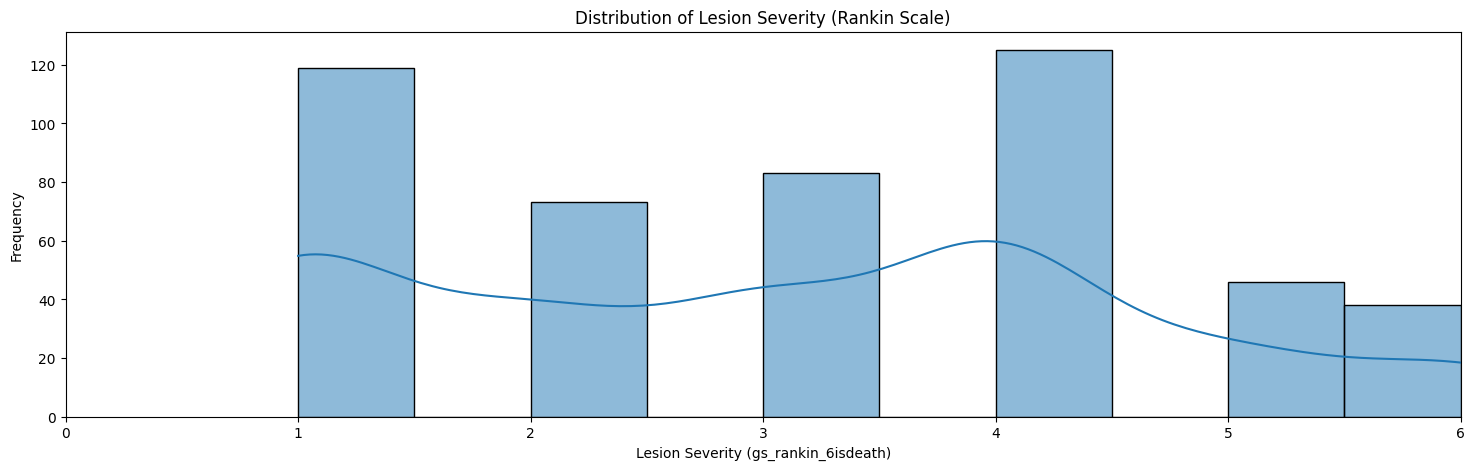

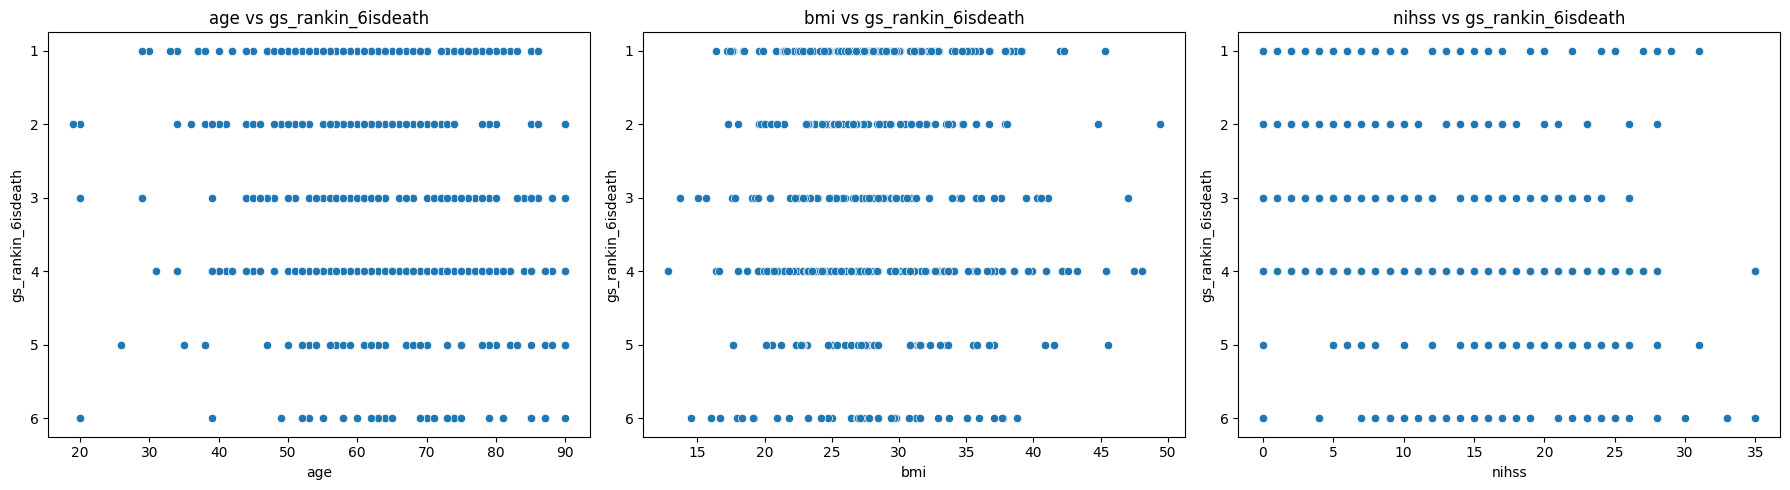

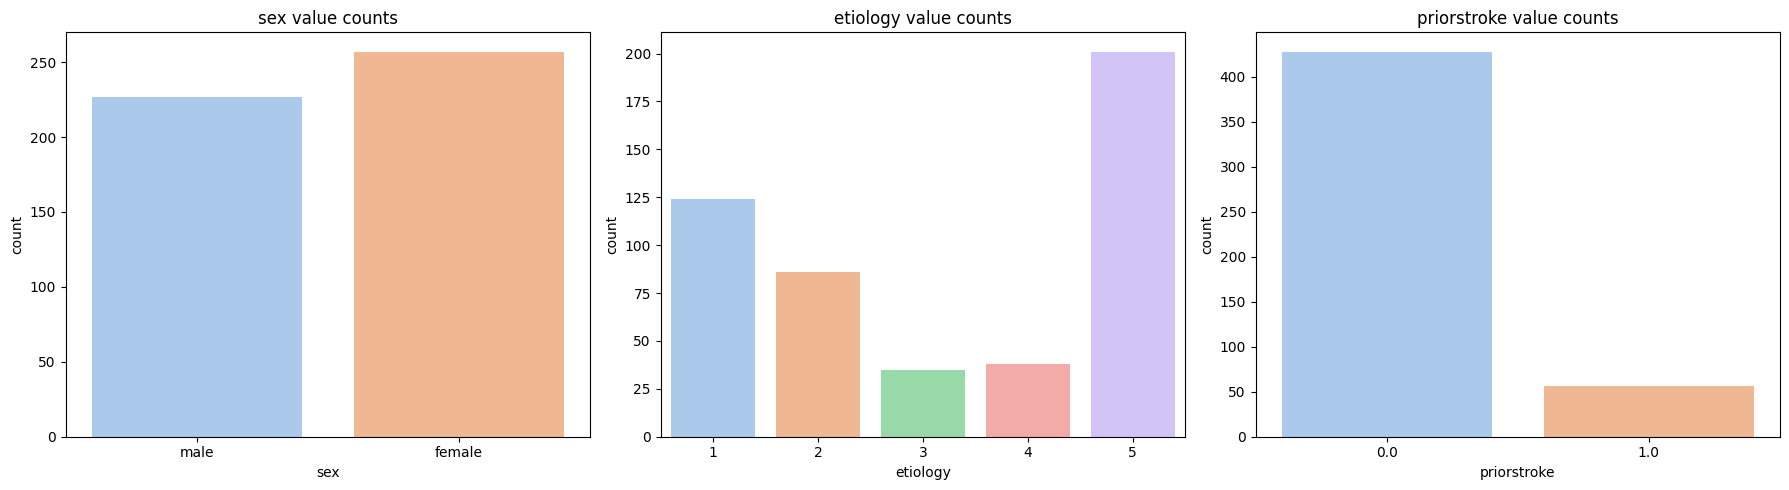

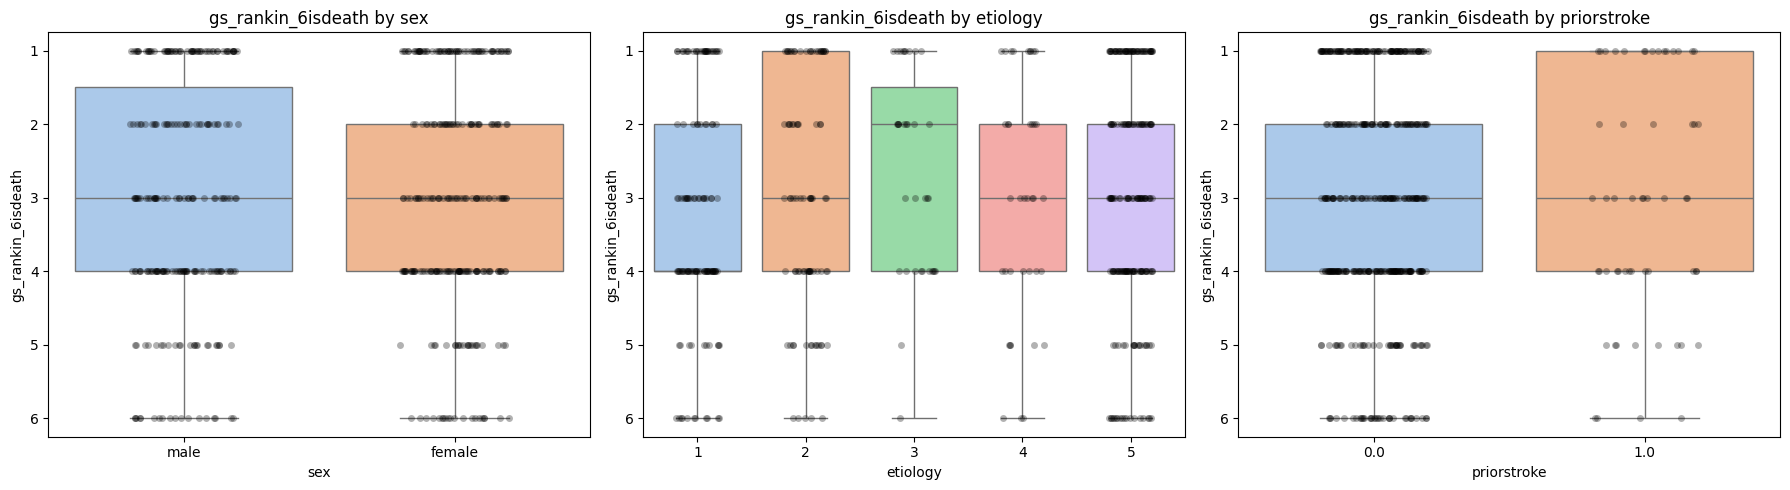

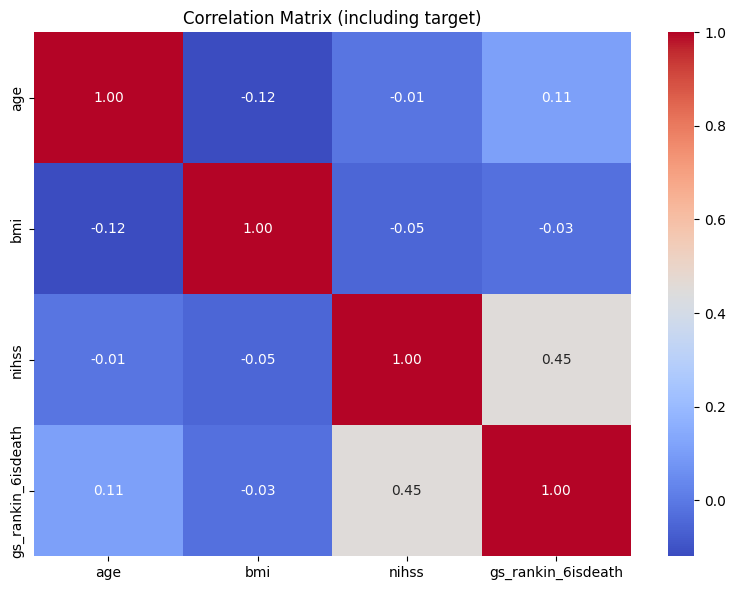

In [4]:
# Plot the target variable histogram 

plt.figure()
sns.histplot(data['gs_rankin_6isdeath'], bins=10, kde=True)
plt.title('Distribution of Lesion Severity (Rankin Scale)')
plt.xlabel('Lesion Severity (gs_rankin_6isdeath)')
plt.ylabel('Frequency')
plt.xlim(0, 6)

# Plot clinical features 

def plot_features_vs_target(data, features, target, plots_per_row=3):
    """
    Visualizes features vs target in grid layout.
    - Numeric features: Scatterplots (grid) + final correlation heatmap
    - Categorical features: Barplots + Boxplots (grids)
    """
    numeric_feats = []
    categorical_feats = []

    # Separate numeric and categorical
    for feature in features:
        if feature not in data.columns:
            print(f"⚠️ Warning: Feature '{feature}' not found in dataset.")
            continue
        if pd.api.types.is_numeric_dtype(data[feature]):
            numeric_feats.append(feature)
        else:
            categorical_feats.append(feature)

    # === GRID: Scatterplots for Numeric Features vs Target ===
    if numeric_feats:
        n = len(numeric_feats)
        rows = math.ceil(n / plots_per_row)
        fig, axes = plt.subplots(rows, plots_per_row, figsize=(6 * plots_per_row, 5 * rows))
        axes = axes.flatten()
        for i, feature in enumerate(numeric_feats):
            sns.scatterplot(x=feature, y=target, data=data, ax=axes[i])
            axes[i].set_title(f'{feature} vs {target}')
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')
        plt.tight_layout()
        plt.show()

    # === GRID: Barplots for Categorical Distributions ===
    if categorical_feats:
        n = len(categorical_feats)
        rows = math.ceil(n / plots_per_row)
        fig, axes = plt.subplots(rows, plots_per_row, figsize=(6 * plots_per_row, 5 * rows))
        axes = axes.flatten()
        for i, feature in enumerate(categorical_feats):
            sns.countplot(x=feature, data=data, palette='pastel', ax=axes[i])
            axes[i].set_title(f'{feature} value counts')
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')
        plt.tight_layout()
        plt.show()

    # === GRID: Boxplots for Categorical Features vs Target ===
    if categorical_feats:
        n = len(categorical_feats)
        rows = math.ceil(n / plots_per_row)
        fig, axes = plt.subplots(rows, plots_per_row, figsize=(6 * plots_per_row, 5 * rows))
        axes = axes.flatten()
        for i, feature in enumerate(categorical_feats):
            sns.boxplot(x=feature, y=target, data=data, palette='pastel', ax=axes[i])
            sns.stripplot(x=feature, y=target, data=data, color='black', alpha=0.3, jitter=0.2, ax=axes[i])
            axes[i].set_title(f'{target} by {feature}')
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')
        plt.tight_layout()
        plt.show()

    # === Correlation Heatmap ===
    try:
        target_as_numeric = data[target].astype(float)
        valid_numeric = [f for f in numeric_feats if pd.api.types.is_numeric_dtype(data[f])]
        corr_data = data[valid_numeric].copy()
        corr_data[target] = target_as_numeric

        corr_matrix = corr_data.corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix (including target)')
        plt.tight_layout()
        plt.show()
    except ValueError:
        print(f" Could not convert target '{target}' to numeric for correlation heatmap.")


# Example usage:
clinical_features = ['sex', 'age', 'bmi', 'nihss', 'etiology', 'priorstroke']
plot_features_vs_target(data_clinical, clinical_features, target='gs_rankin_6isdeath', plots_per_row=3)


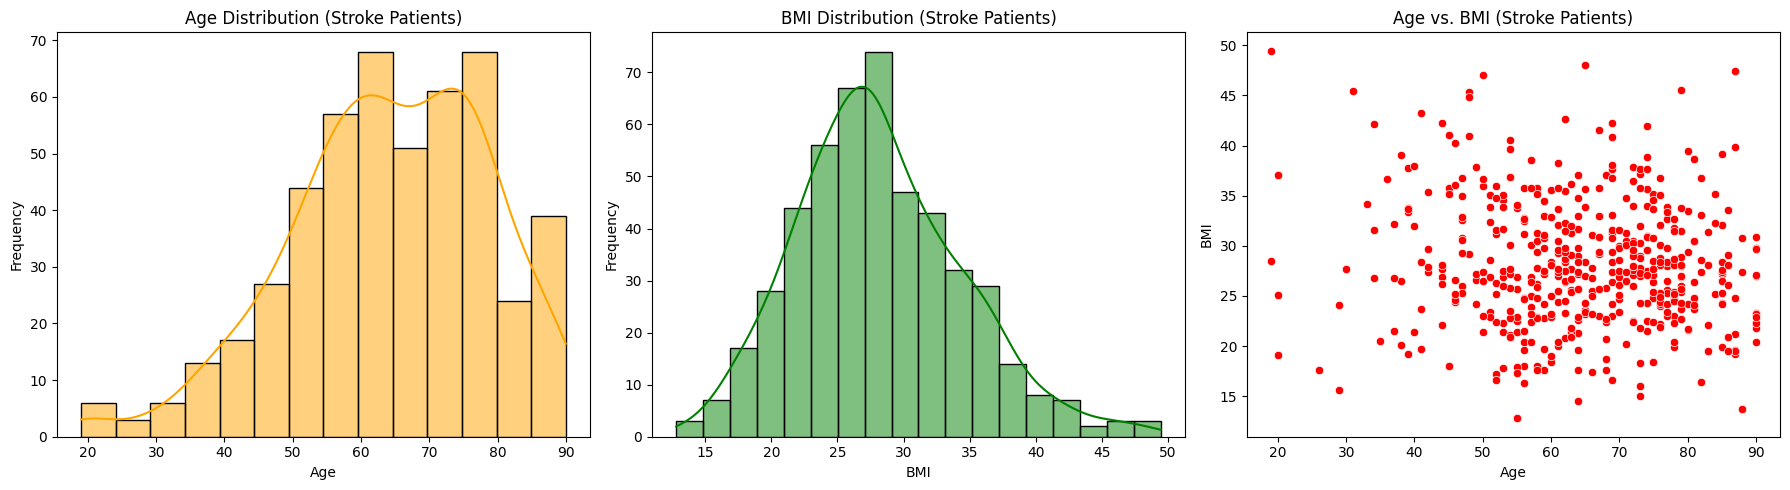

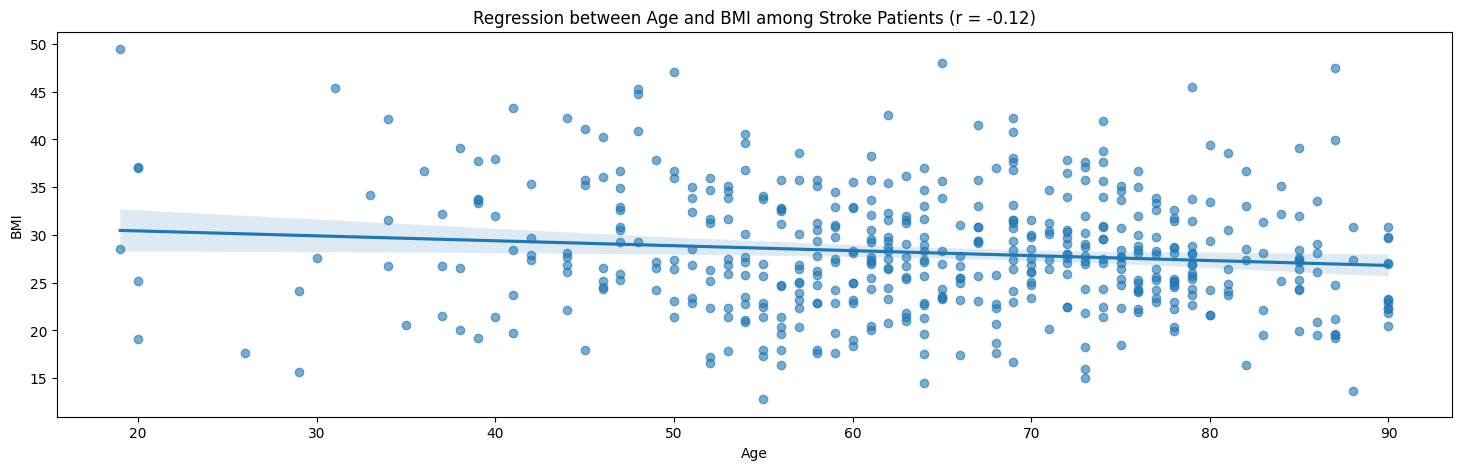

In [5]:

# Arrange the three plots in a 1x3 grid.
fig2, axs2 = plt.subplots(1, 3)

# 6.1 Age Distribution for Stroke Patients
sns.histplot(data_clinical['age'], kde=True, ax=axs2[0], color='orange')
axs2[0].set_title("Age Distribution (Stroke Patients)")
axs2[0].set_xlabel("Age")
axs2[0].set_ylabel("Frequency")

# 6.2 BMI Distribution for Stroke Patients
sns.histplot(data_clinical['bmi'], kde=True, ax=axs2[1], color='green')
axs2[1].set_title("BMI Distribution (Stroke Patients)")
axs2[1].set_xlabel("BMI")
axs2[1].set_ylabel("Frequency")

# 6.3 Combined Scatter: Age vs. BMI (Stroke Patients)
sns.scatterplot(x='age', y='bmi', data=data_clinical, ax=axs2[2], color='red')
axs2[2].set_title("Age vs. BMI (Stroke Patients)")
axs2[2].set_xlabel("Age")
axs2[2].set_ylabel("BMI")

plt.tight_layout()
plt.show()


# Regression between Age and BMI among Stroke Patients
# Compute the Pearson correlation coefficient between Age and BMI.
corr_val = data_clinical['age'].corr(data_clinical['bmi'])

# Create a plot with a regression line.
plt.figure()
sns.regplot(data=data_clinical, x='age', y='bmi', scatter_kws={'alpha': 0.6})
plt.title(f"Regression between Age and BMI among Stroke Patients (r = {corr_val:.2f})")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

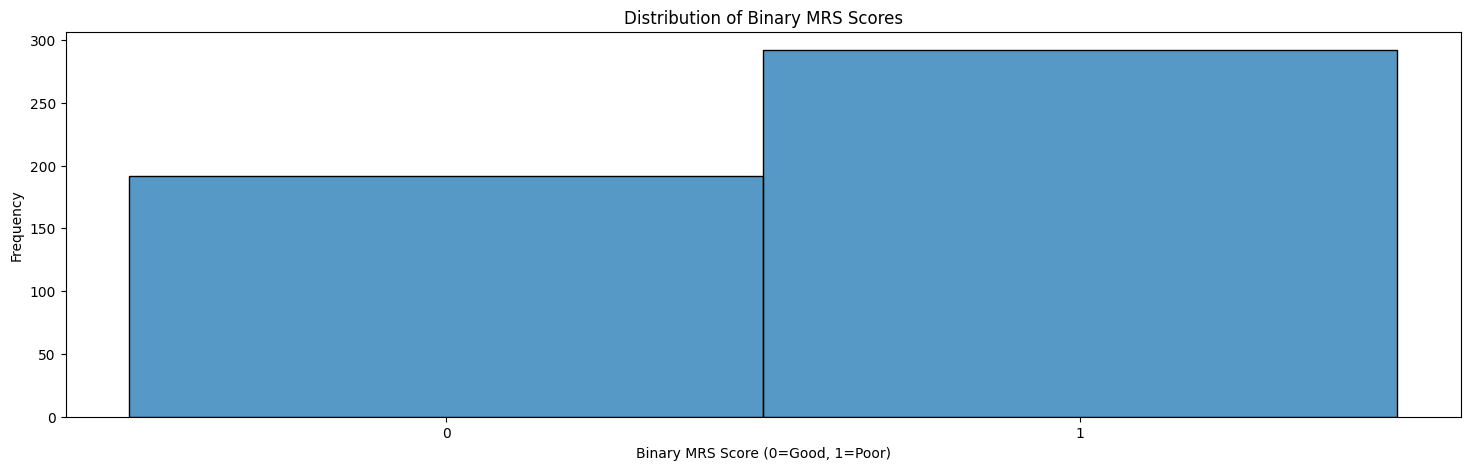

In [6]:
# Binarize the target variable

data['rankin_binary'] = data['gs_rankin_6isdeath'].apply(lambda x: 1 if x >=3 else 0)

# Binarized MRS scores

sns.histplot(data['rankin_binary'], bins=2, discrete=True)

plt.xticks([0, 1])  # Set x-axis ticks to only 0 and 1
plt.xlabel('Binary MRS Score (0=Good, 1=Poor)')
plt.ylabel('Frequency')
plt.title('Distribution of Binary MRS Scores')
plt.show()

### Volumetric Features


 Processing Group 1: Global Lesion Metrics...



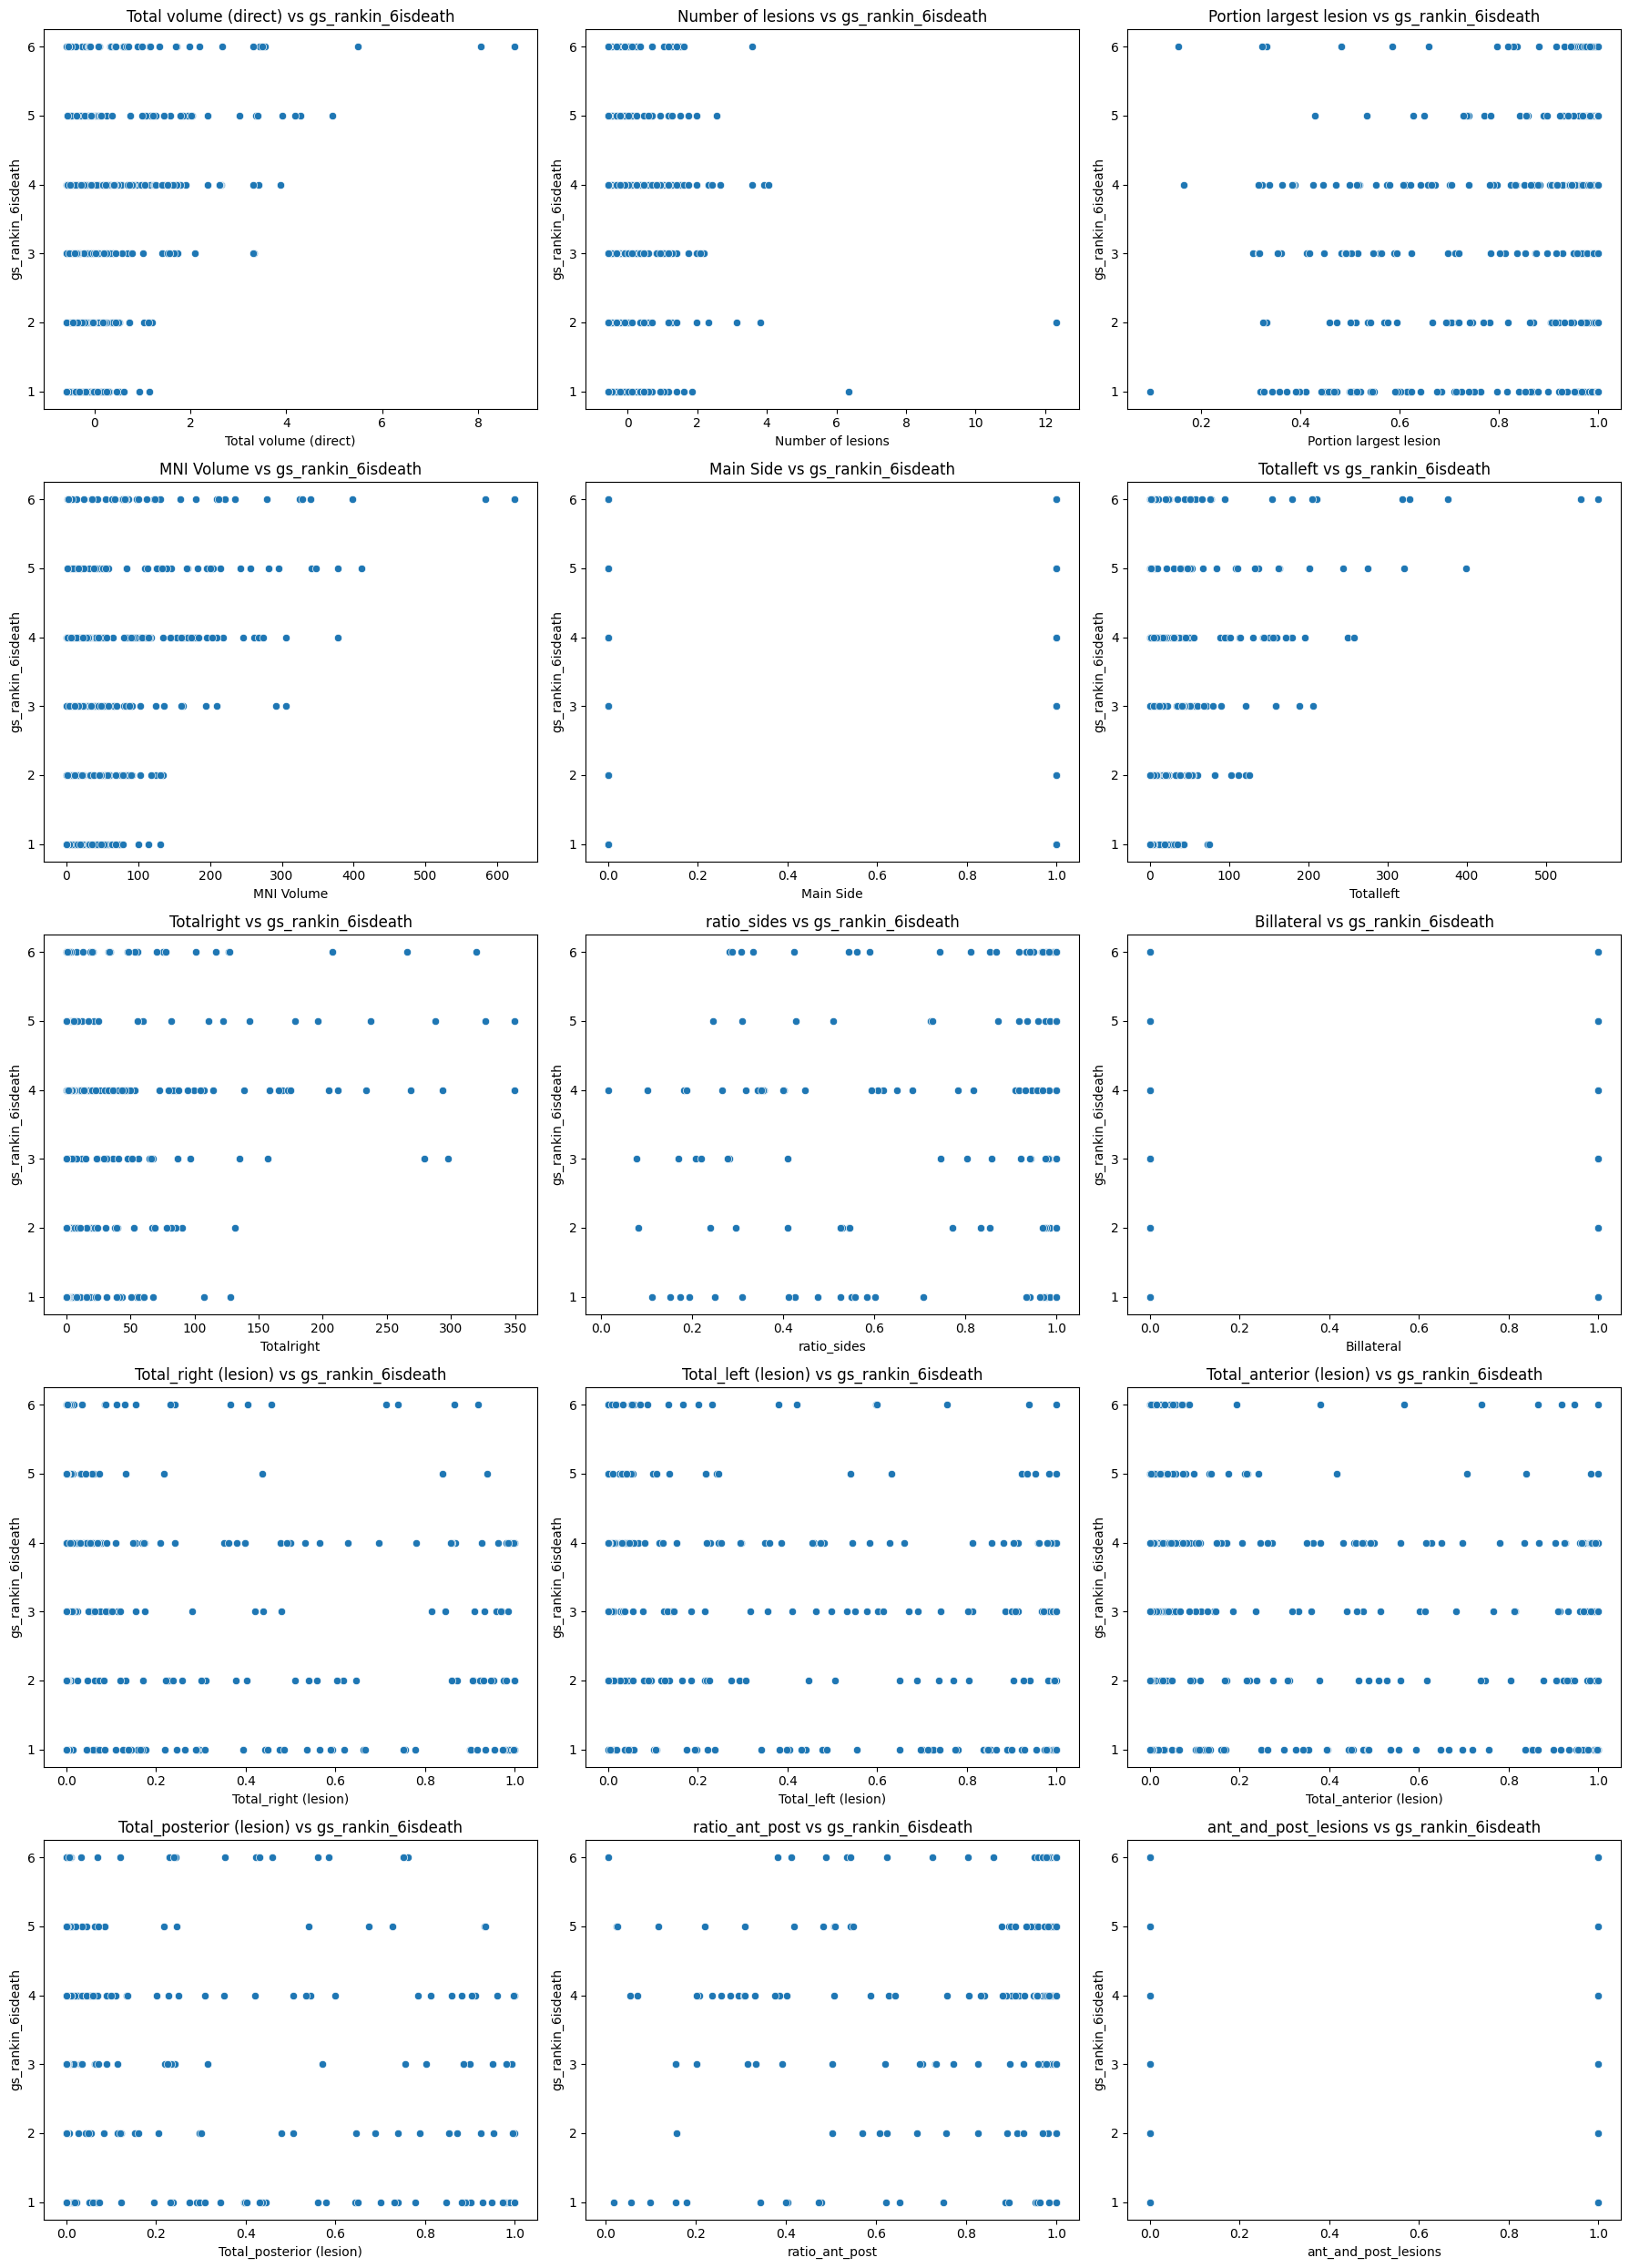

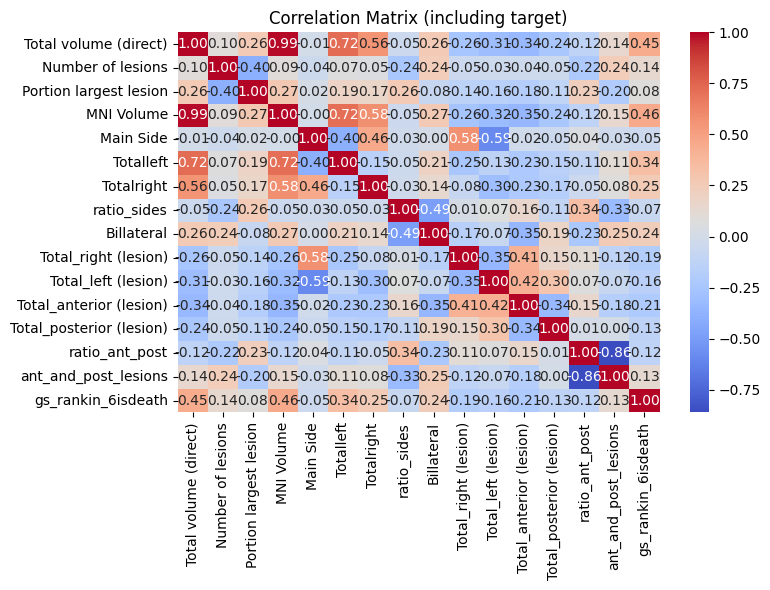


 Processing Group 2: Lesion Volumes by Vascular Territories...



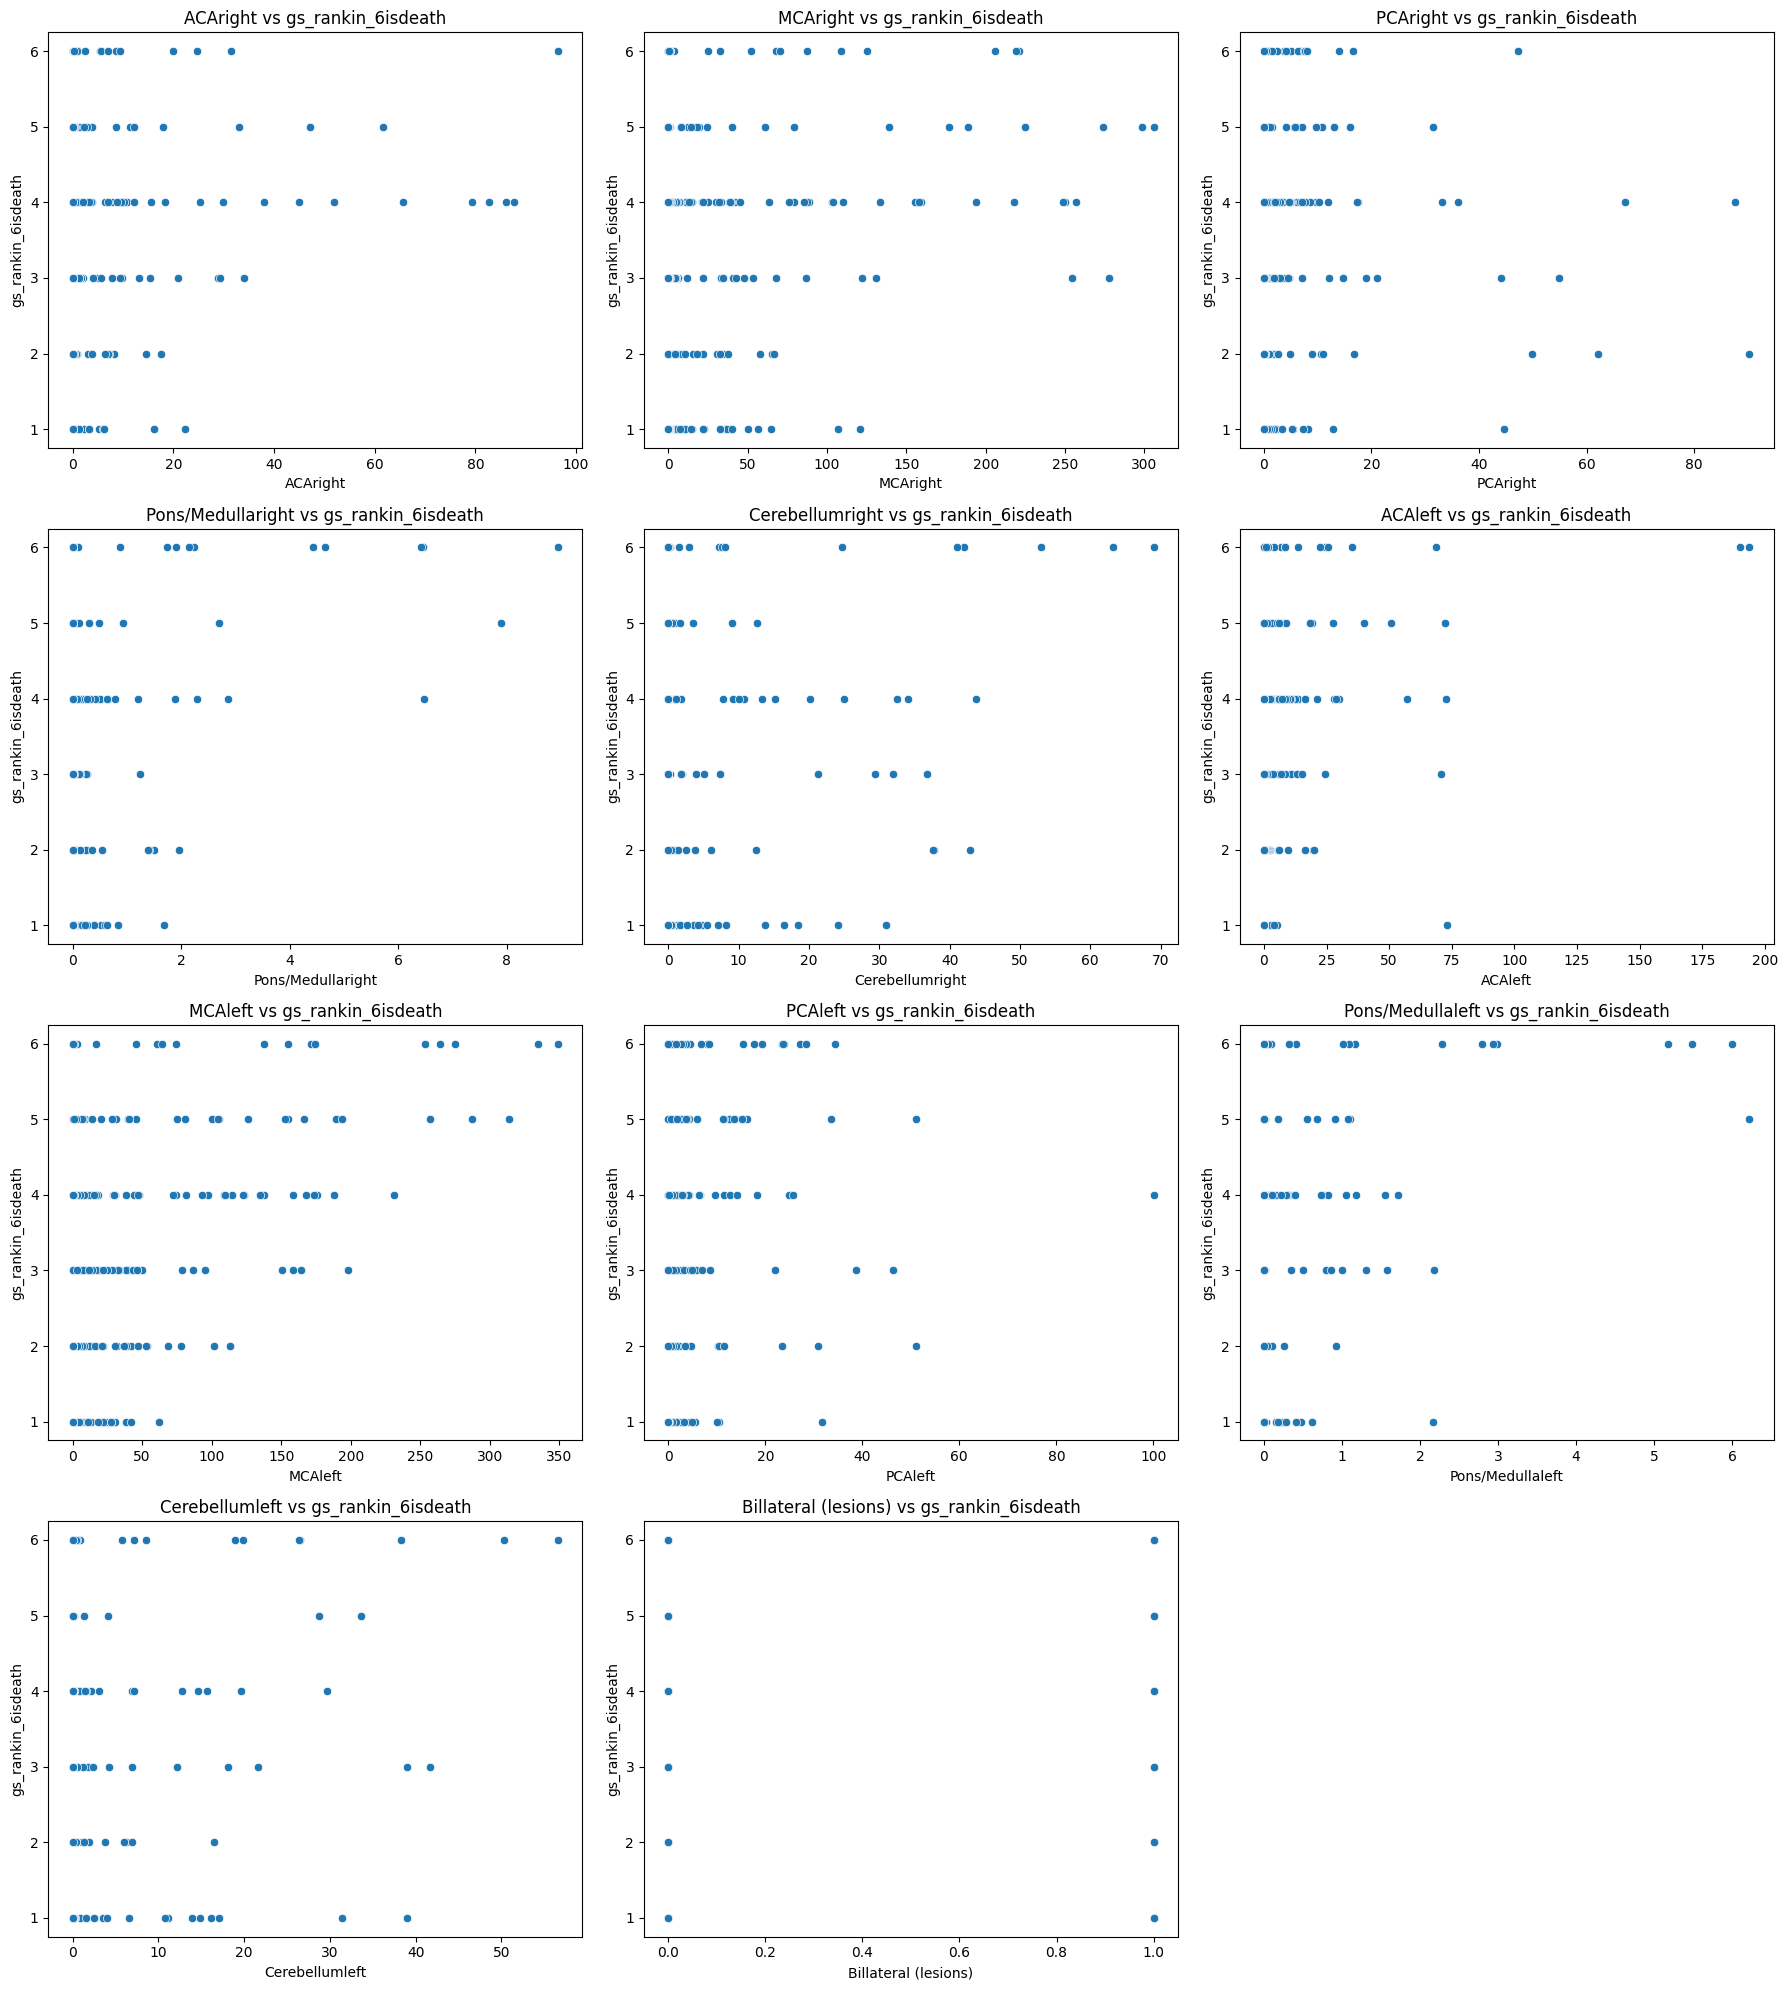

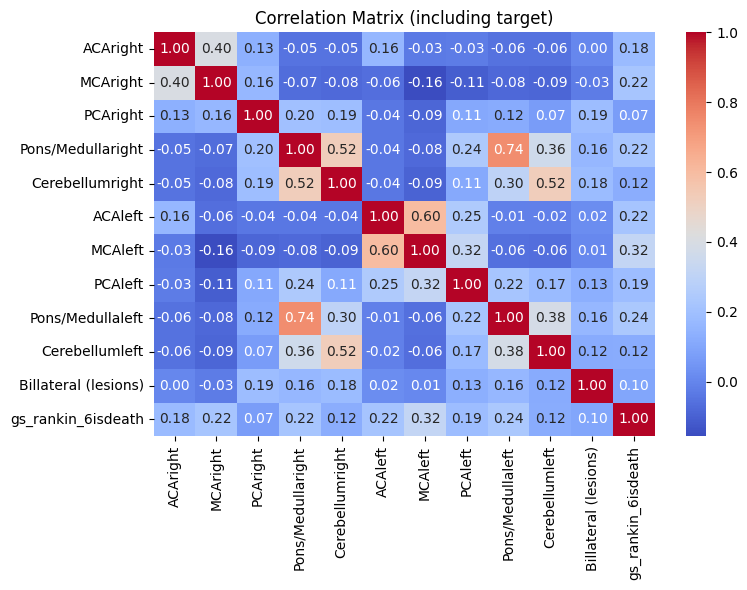


 Processing Group 3: Lesion Counts by Territory...



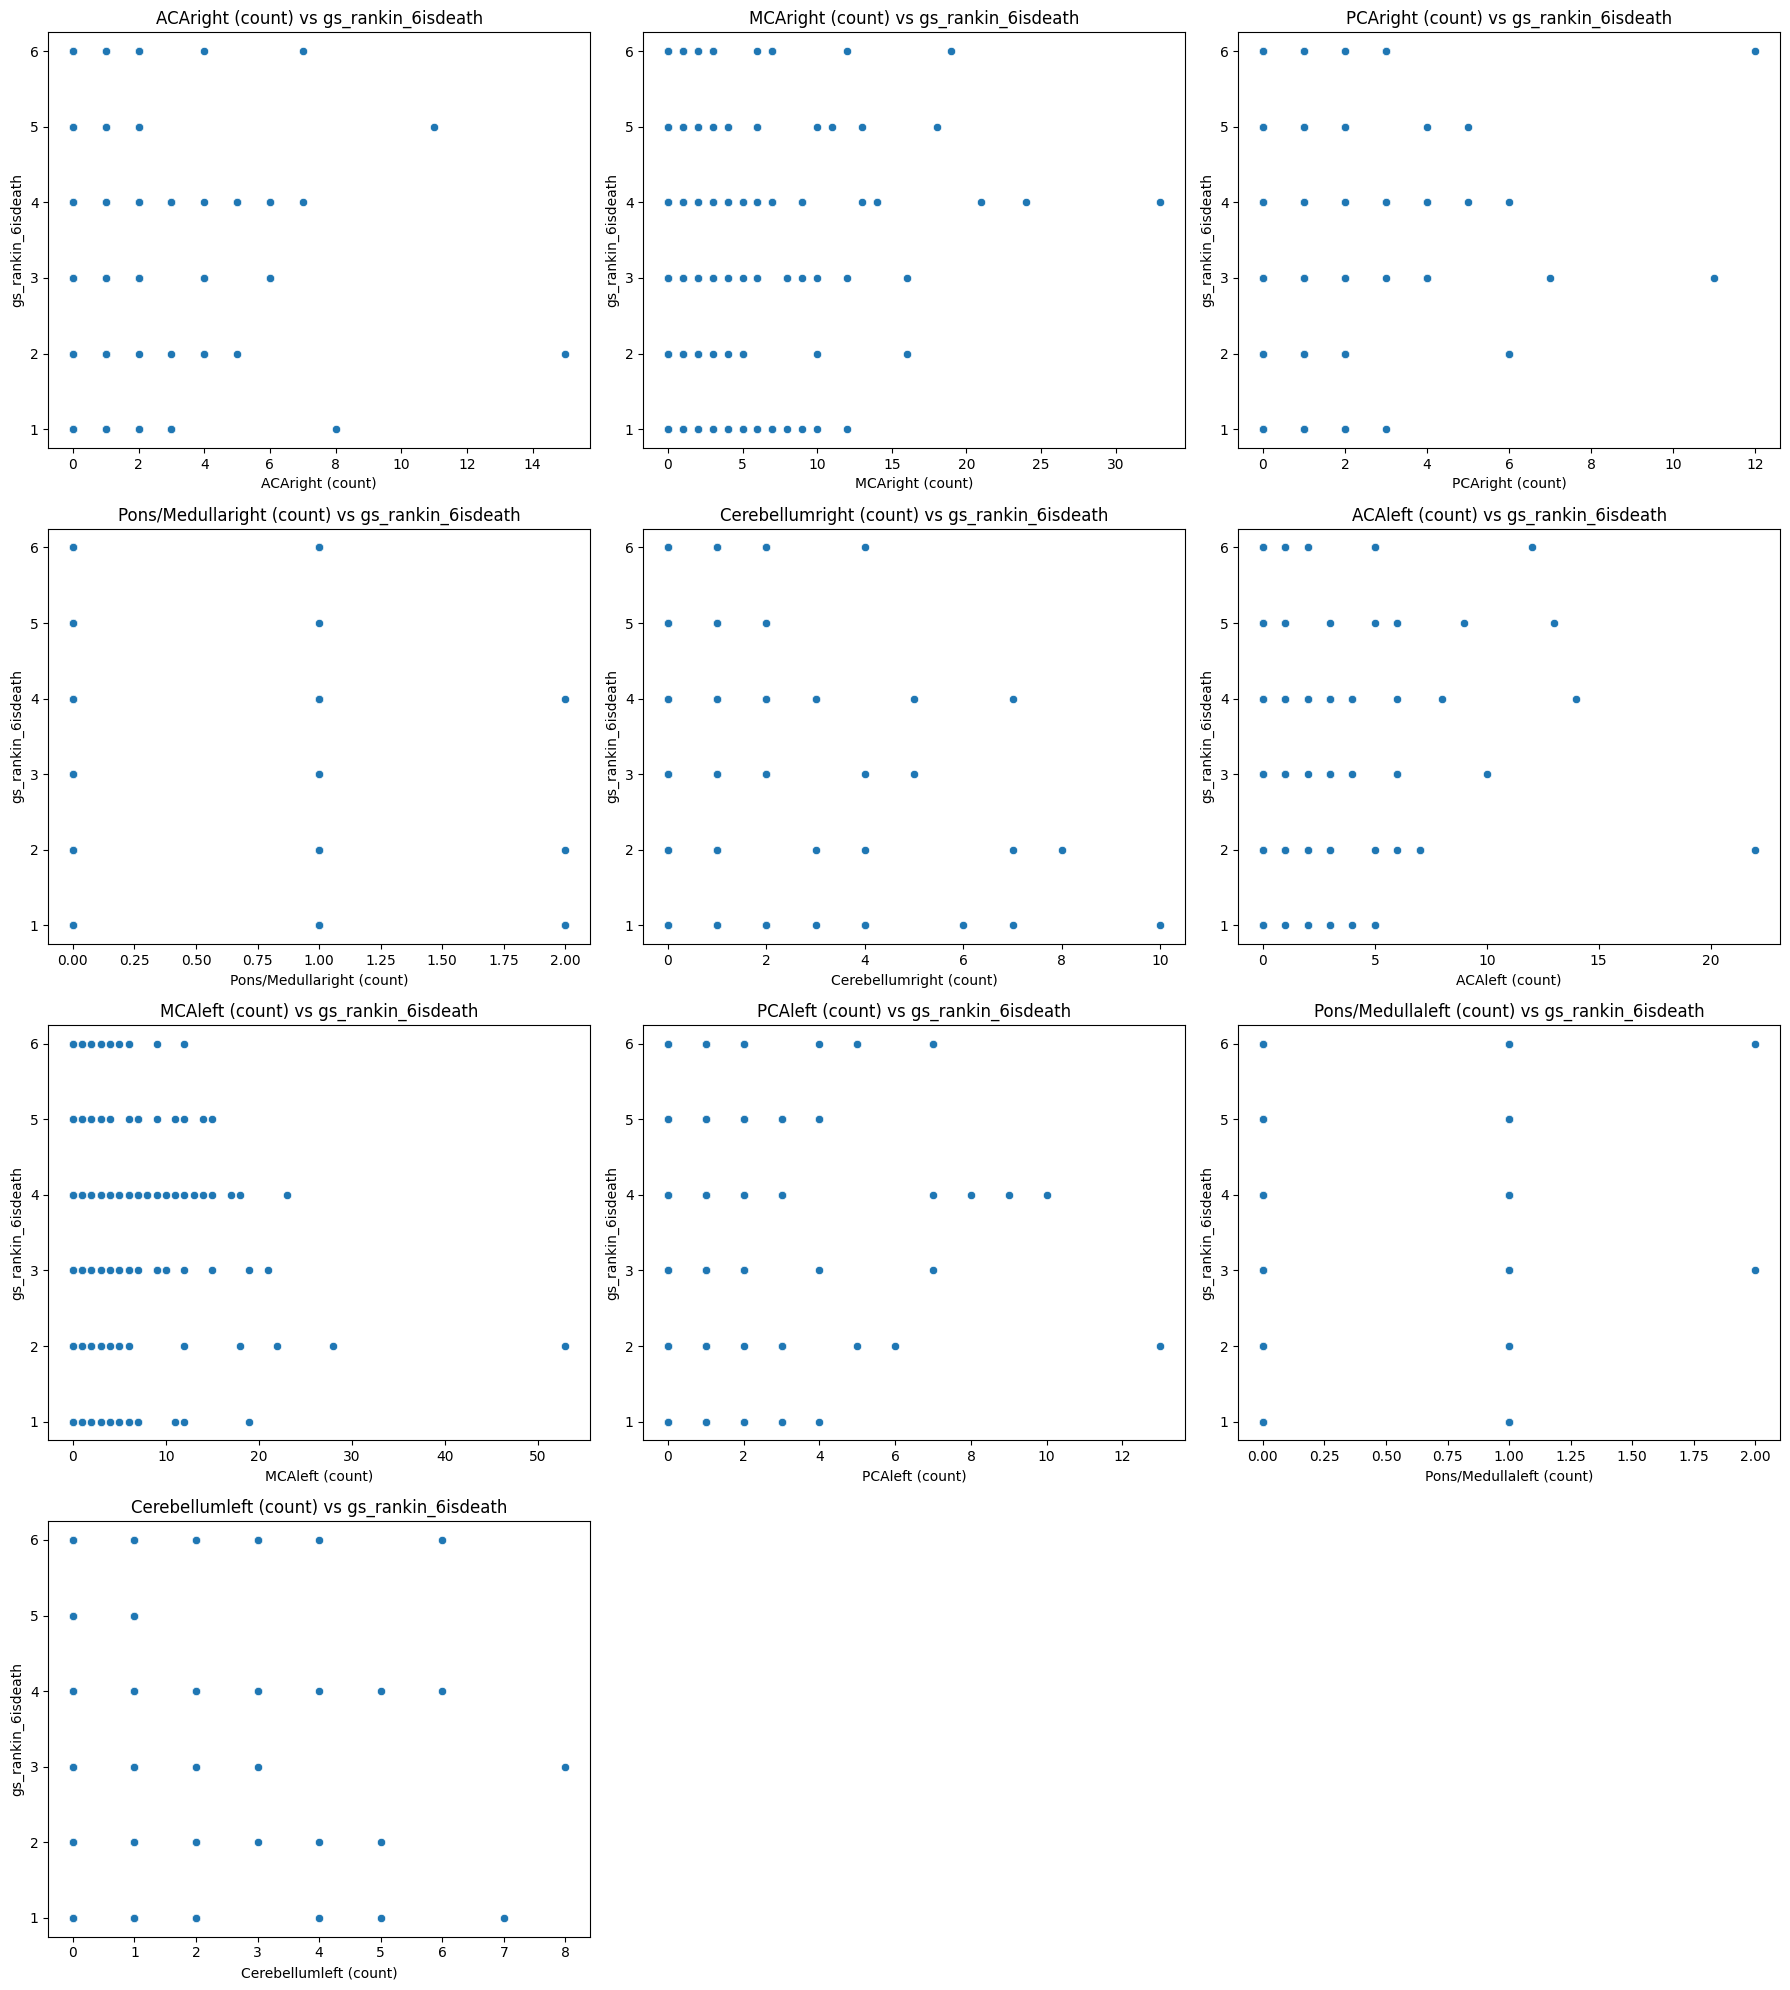

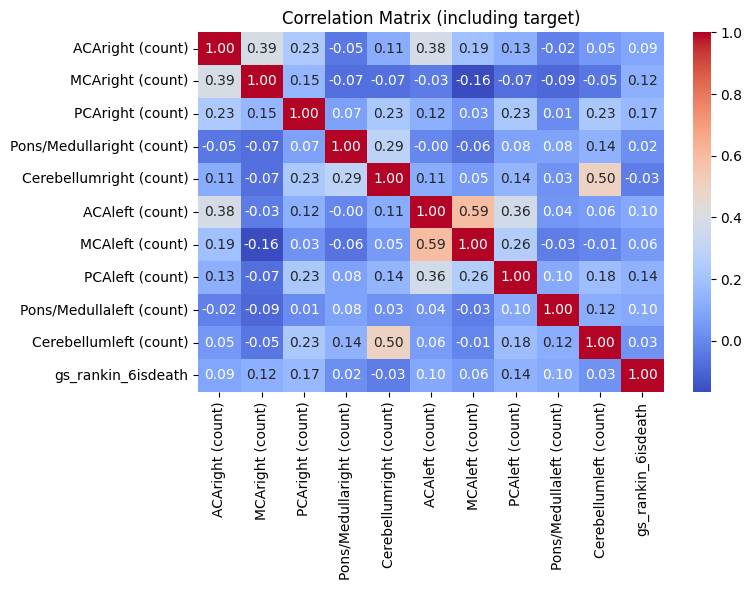


 Processing Group 4: Lesion Volumes by Label...



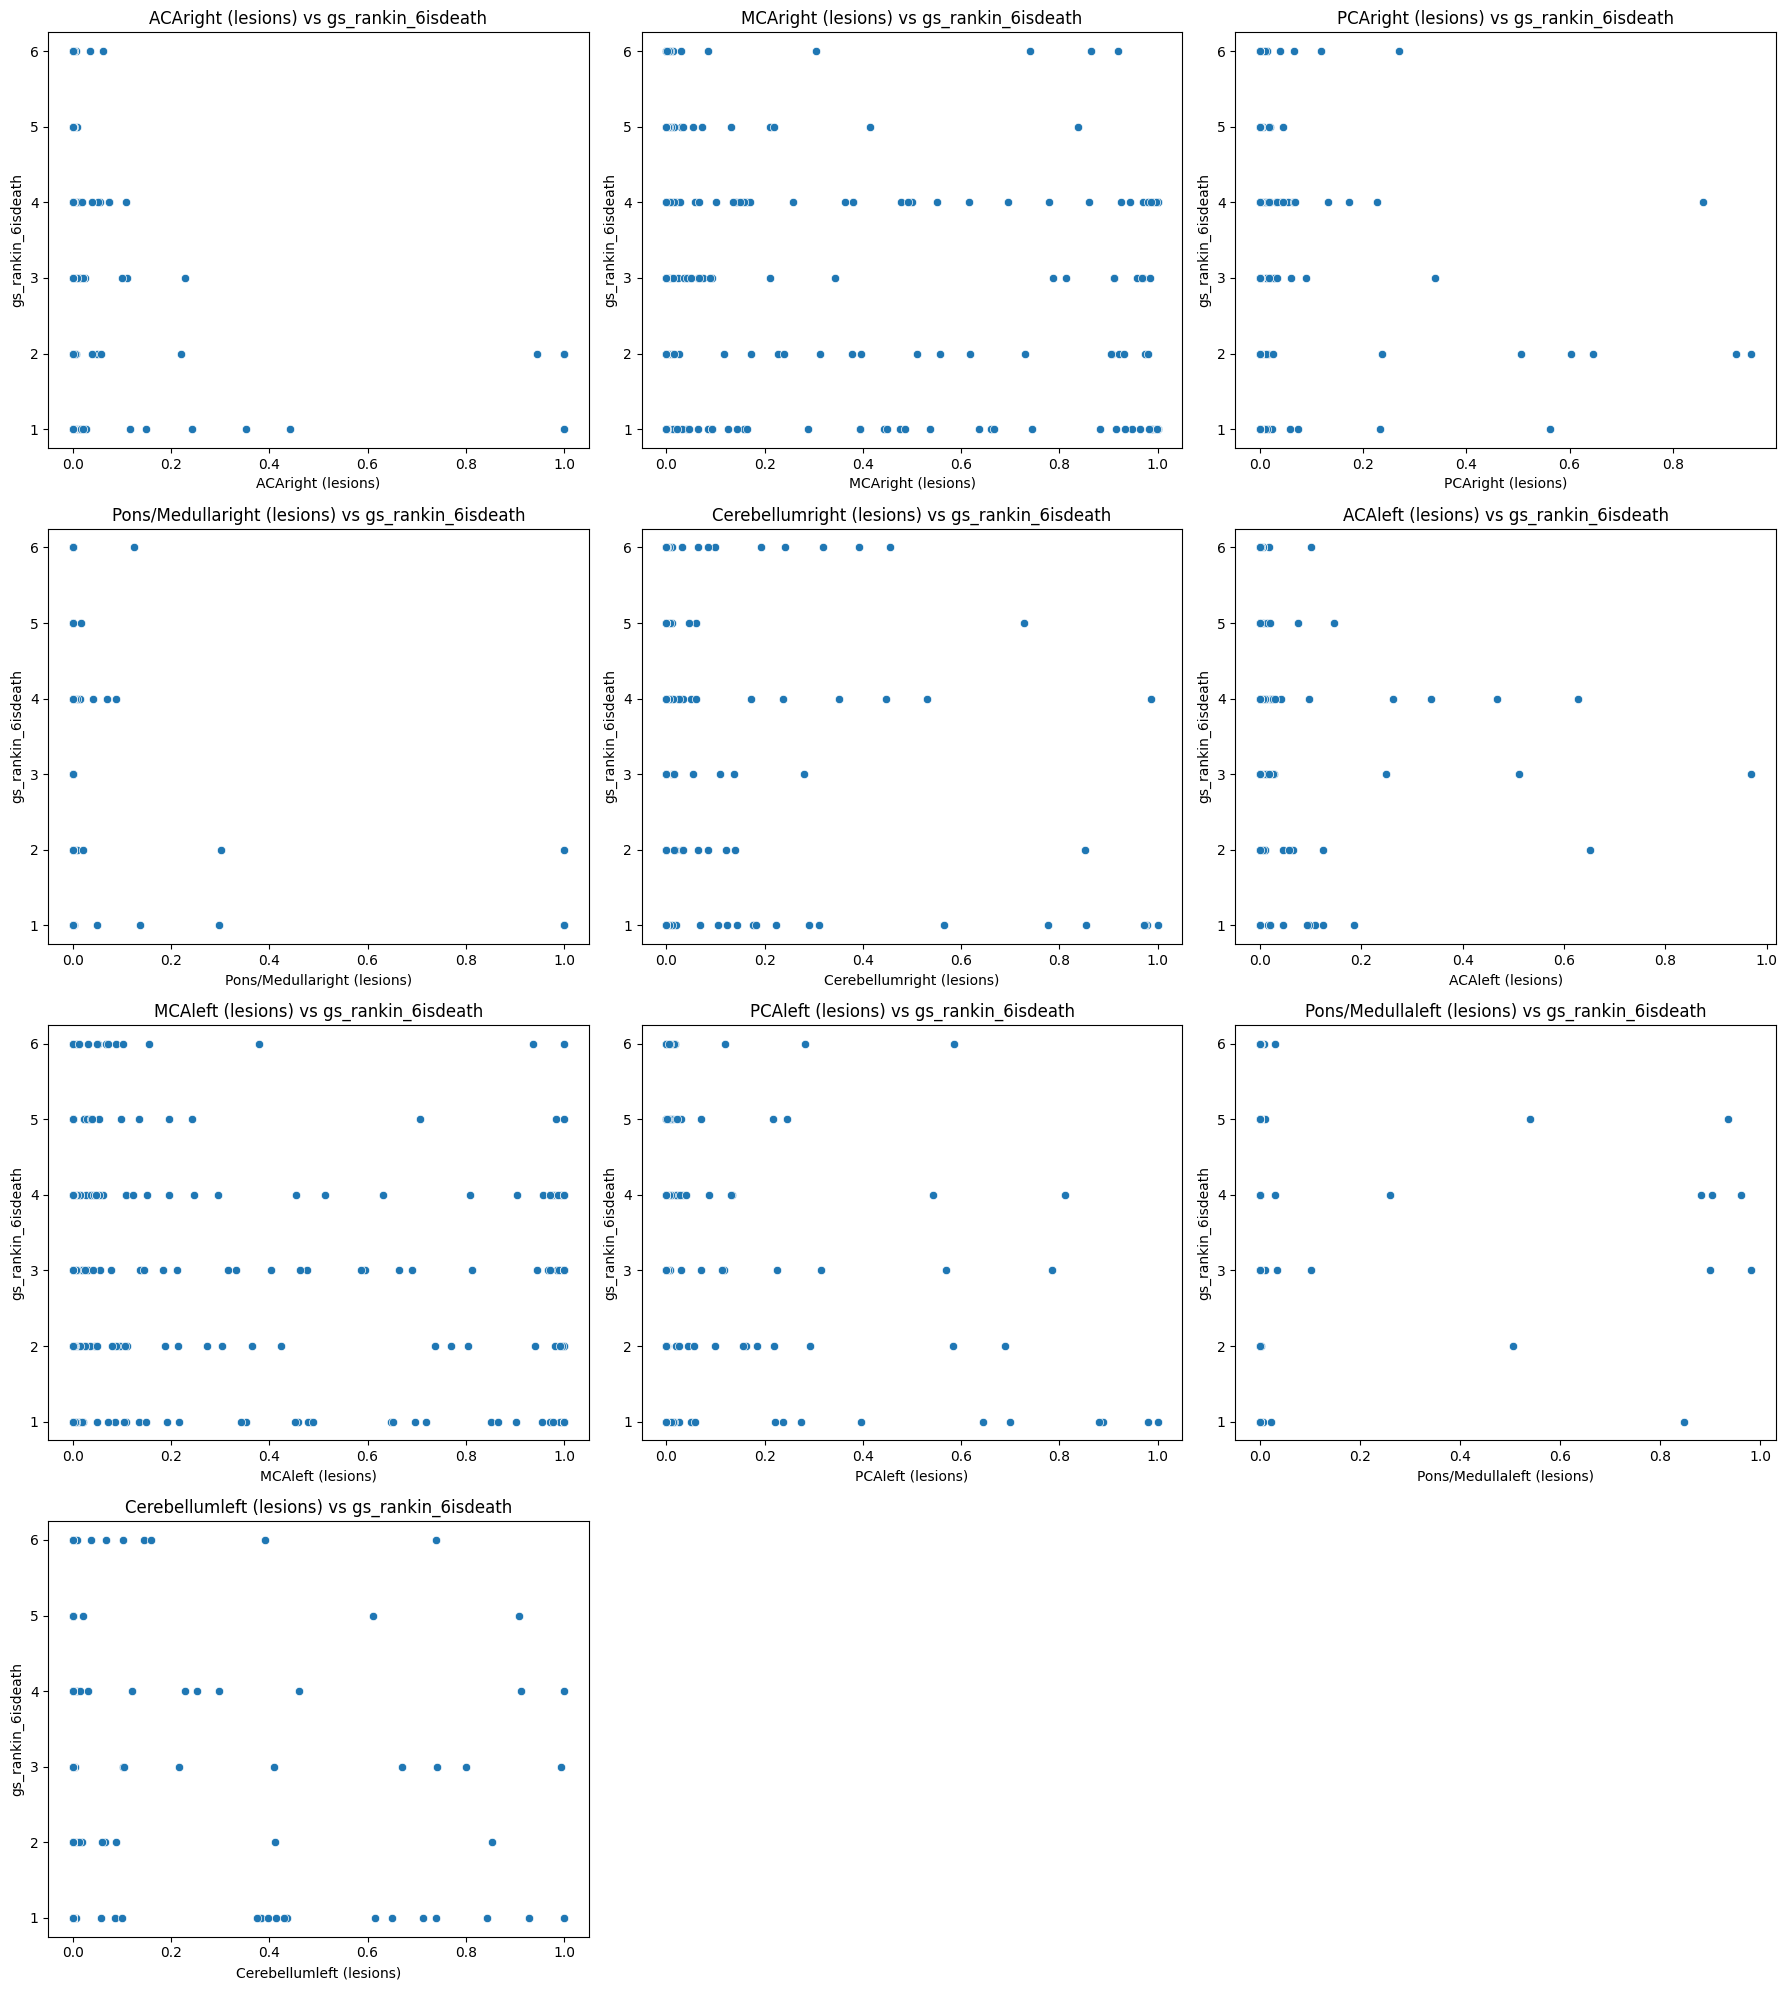

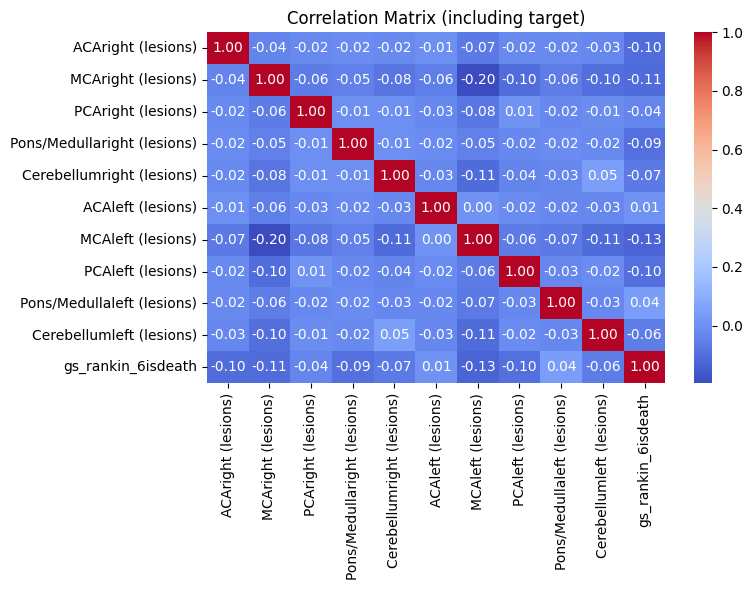


 Processing Group 5: Lesion Volume Proportions...



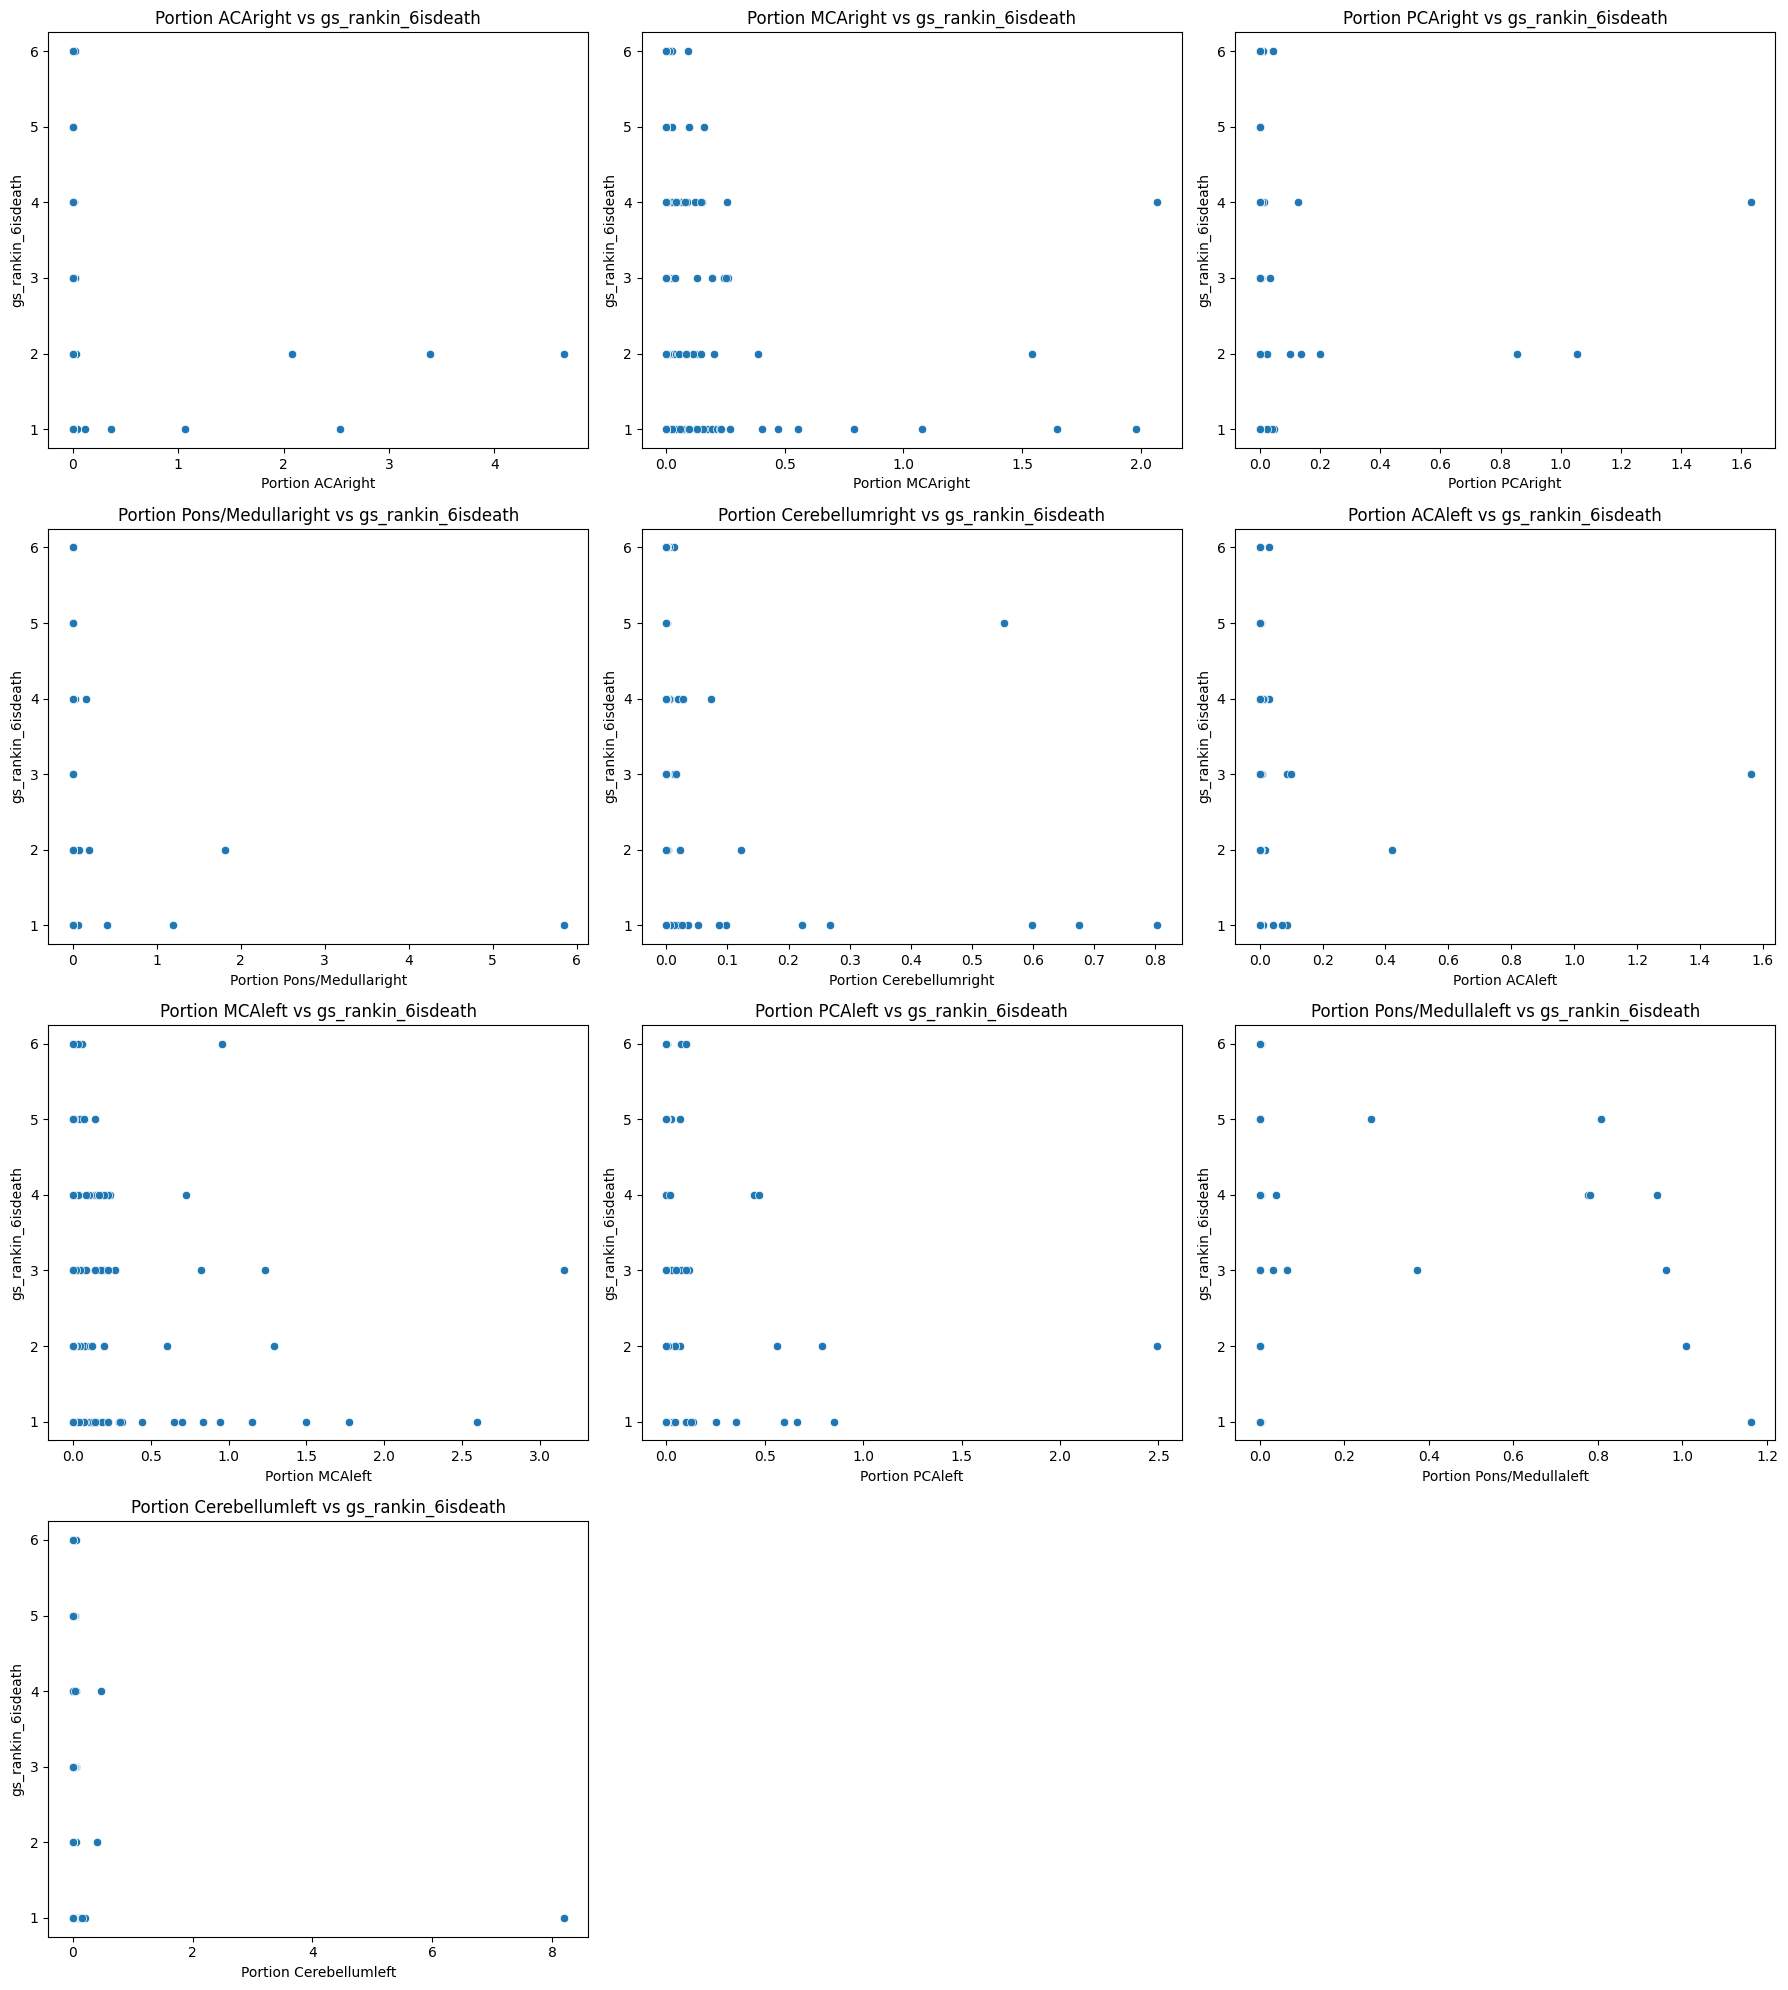

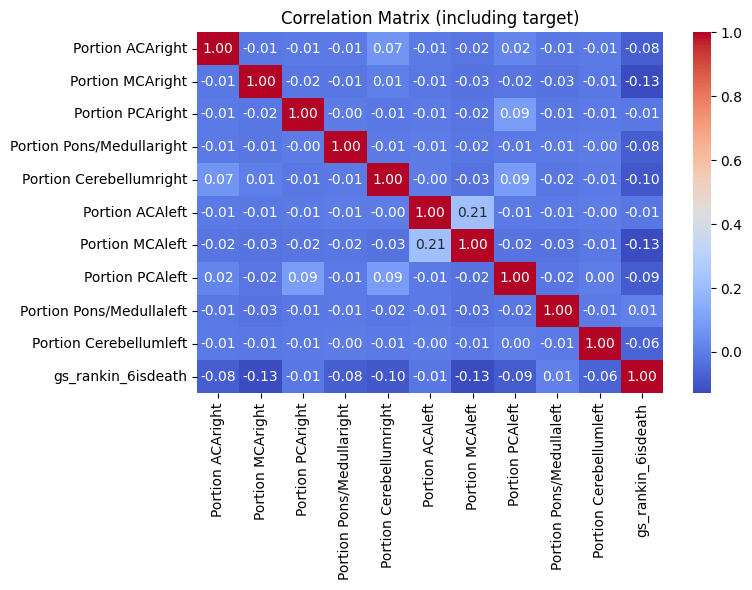


 Processing Group 6: Brain Region Volumes...



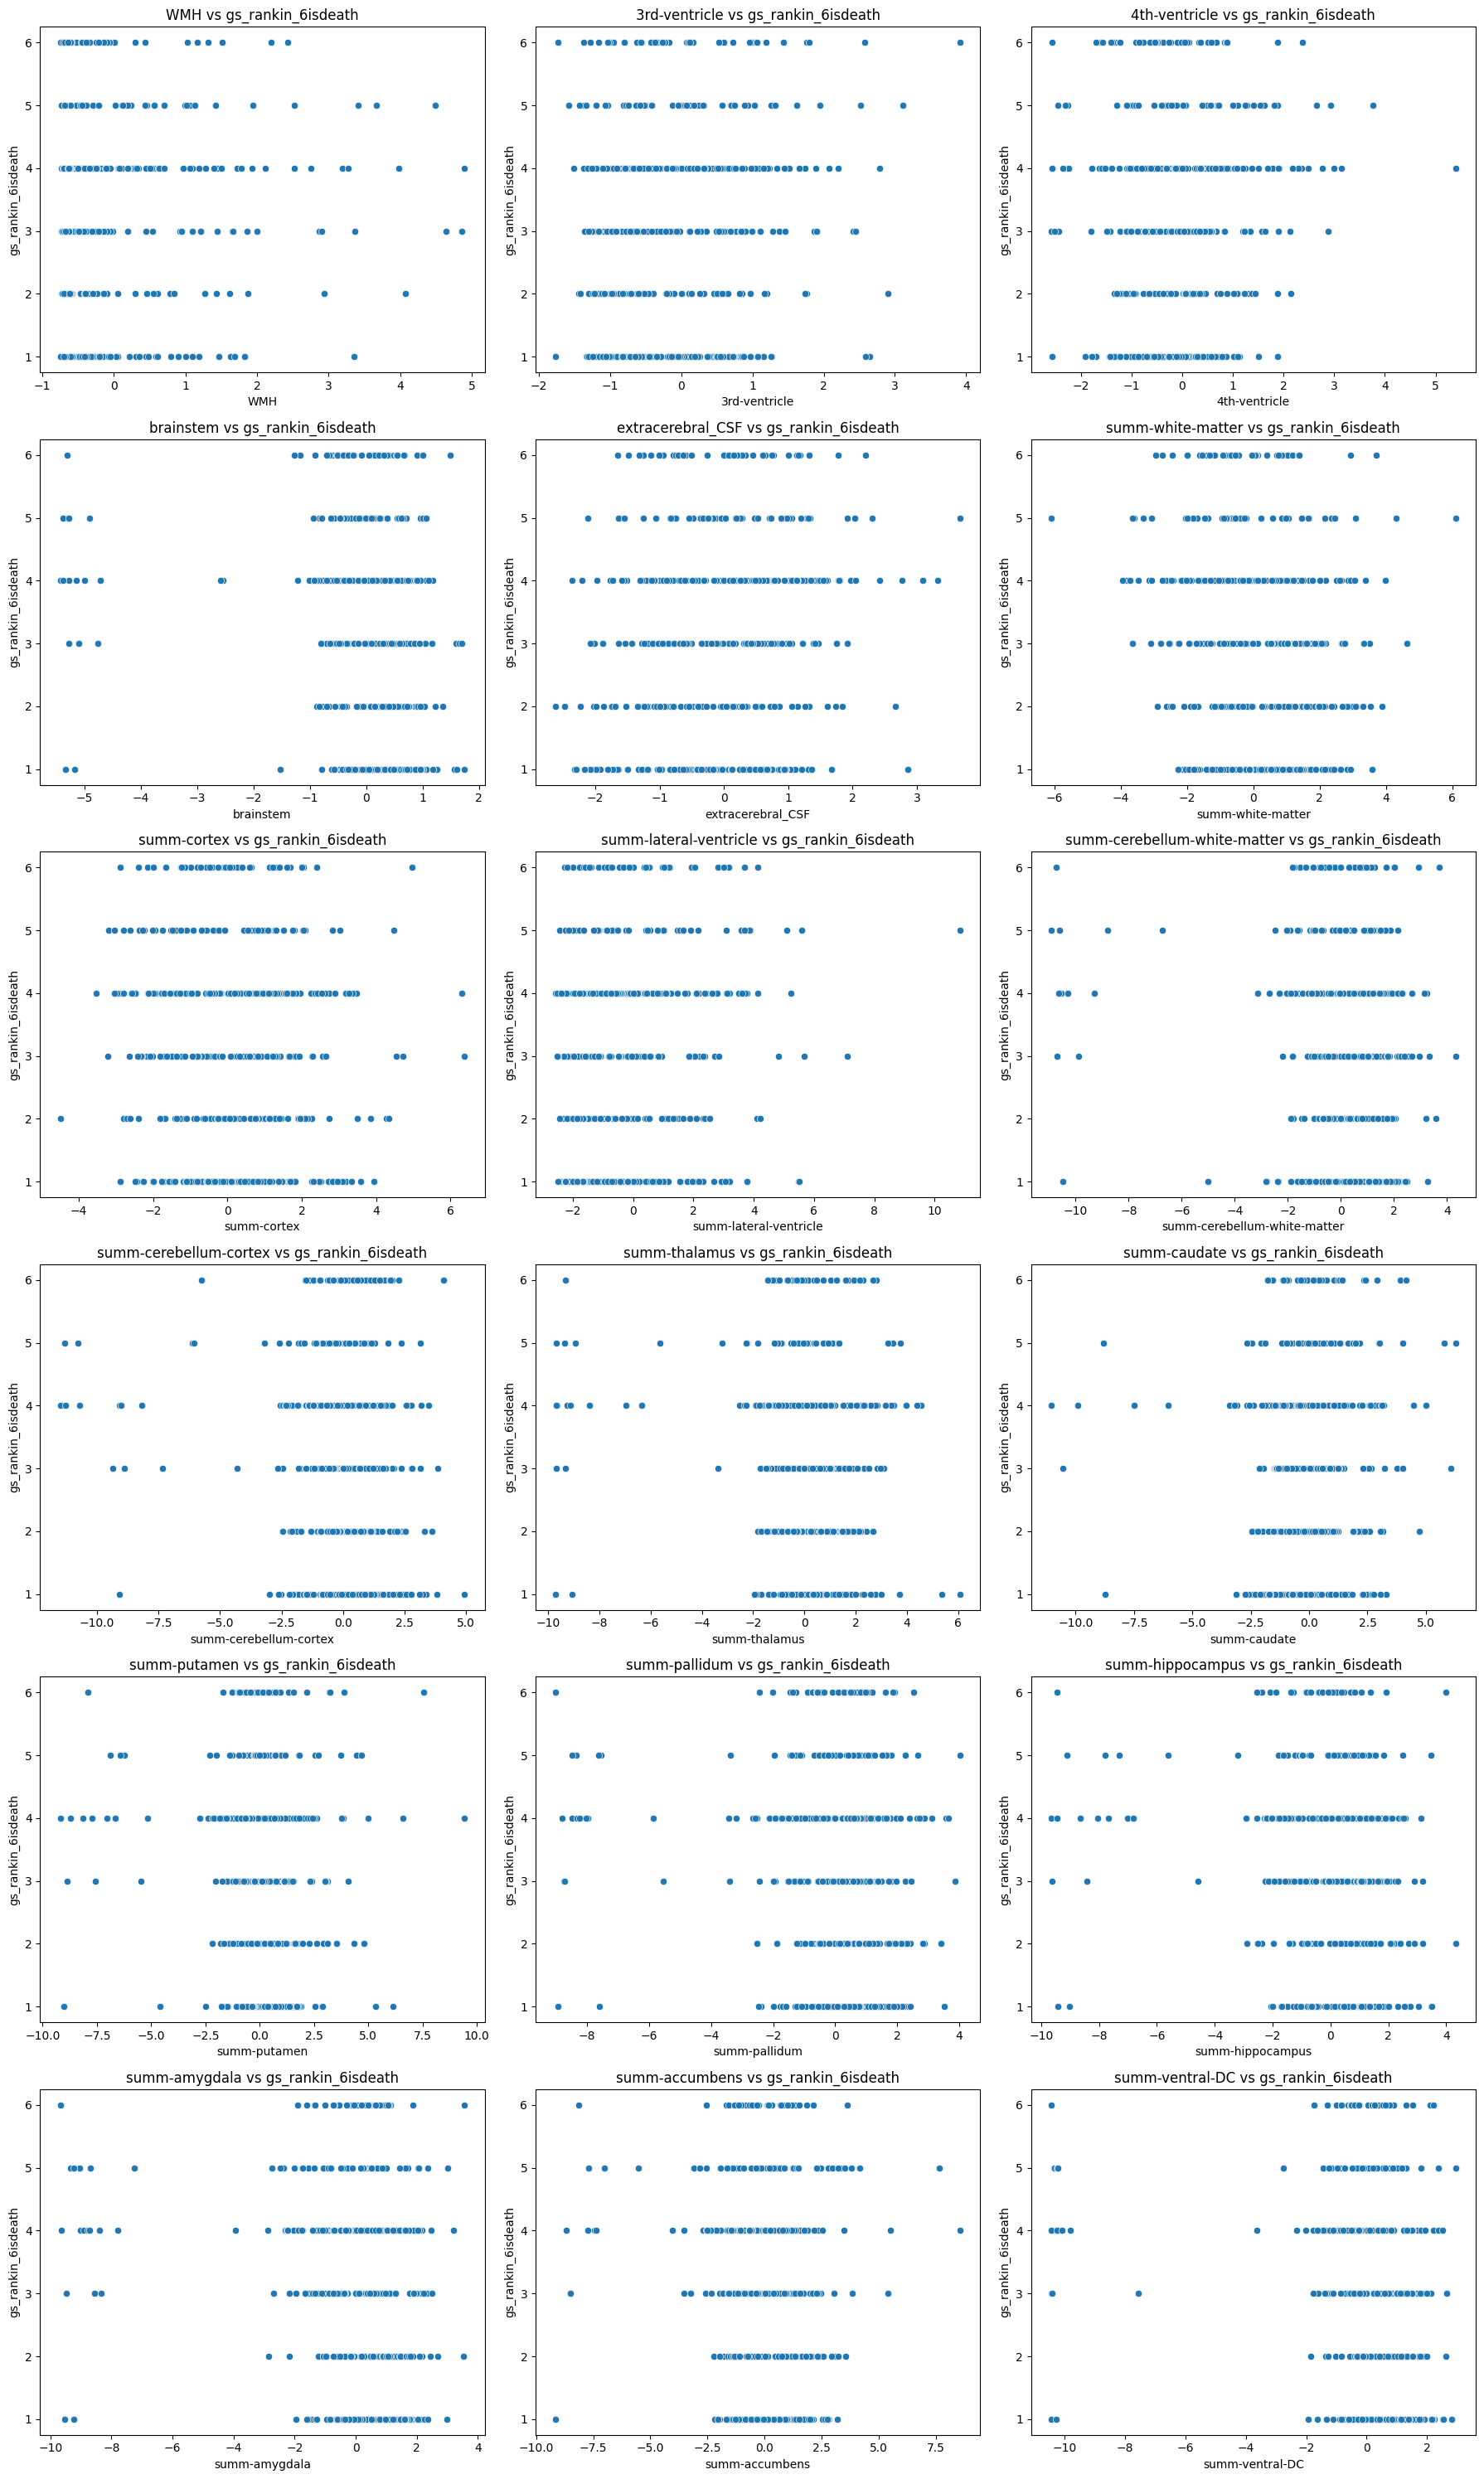

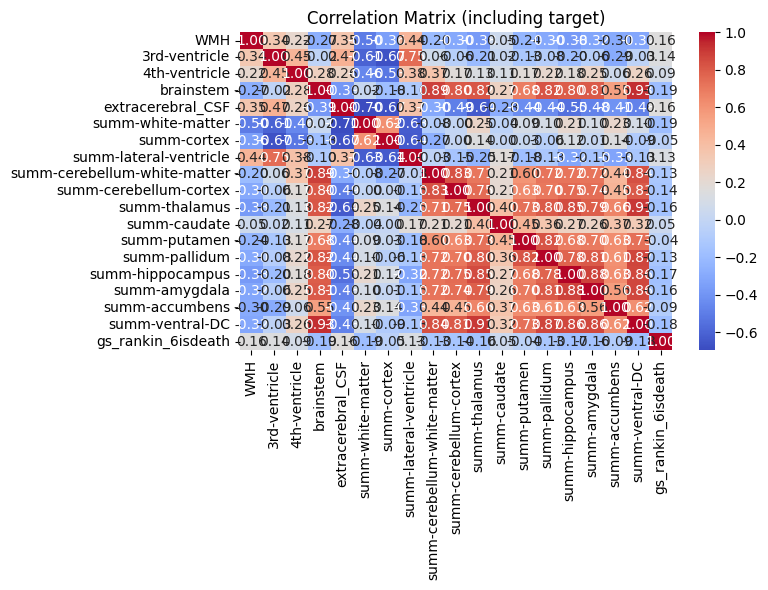

In [7]:
# Define all volumetric features groups
group_1_global_lesion_metrics = [
    'Total volume (direct)', 'Number of lesions', 'Portion largest lesion', 'MNI Volume', 'Main Side',
    'Totalleft', 'Totalright', 'ratio_sides', 'Billateral', 'Total_right (lesion)', 'Total_left (lesion)',
    'Total_anterior (lesion)', 'Total_posterior (lesion)', 'ratio_ant_post', 'ant_and_post_lesions'
]

group_2_lesion_volumes = [
    'ACAright', 'MCAright', 'PCAright', 'Pons/Medullaright', 'Cerebellumright',
    'ACAleft', 'MCAleft', 'PCAleft', 'Pons/Medullaleft', 'Cerebellumleft', 'Billateral (lesions)'
]

group_3_lesion_counts = [
    'ACAright (count)', 'MCAright (count)', 'PCAright (count)', 'Pons/Medullaright (count)', 'Cerebellumright (count)',
    'ACAleft (count)', 'MCAleft (count)', 'PCAleft (count)', 'Pons/Medullaleft (count)', 'Cerebellumleft (count)'
]

group_4_lesion_volumes_by_label = [
    'ACAright (lesions)', 'MCAright (lesions)', 'PCAright (lesions)', 'Pons/Medullaright (lesions)', 'Cerebellumright (lesions)',
    'ACAleft (lesions)', 'MCAleft (lesions)', 'PCAleft (lesions)', 'Pons/Medullaleft (lesions)', 'Cerebellumleft (lesions)'
]

group_5_lesion_proportions = [
    'Portion ACAright', 'Portion MCAright', 'Portion PCAright', 'Portion Pons/Medullaright', 'Portion Cerebellumright',
    'Portion ACAleft', 'Portion MCAleft', 'Portion PCAleft', 'Portion Pons/Medullaleft', 'Portion Cerebellumleft'
]

group_6_brain_region_volumes = [
    'WMH', '3rd-ventricle', '4th-ventricle', 'brainstem', 'extracerebral_CSF',
    'summ-white-matter', 'summ-cortex', 'summ-lateral-ventricle', 'summ-cerebellum-white-matter',
    'summ-cerebellum-cortex', 'summ-thalamus', 'summ-caudate', 'summ-putamen',
    'summ-pallidum', 'summ-hippocampus', 'summ-amygdala', 'summ-accumbens', 'summ-ventral-DC'
]

# Store in dictionary
volumetric_feature_groups = {
    'Group 1: Global Lesion Metrics': group_1_global_lesion_metrics,
    'Group 2: Lesion Volumes by Vascular Territories': group_2_lesion_volumes,
    'Group 3: Lesion Counts by Territory': group_3_lesion_counts,
    'Group 4: Lesion Volumes by Label': group_4_lesion_volumes_by_label,
    'Group 5: Lesion Volume Proportions': group_5_lesion_proportions,
    'Group 6: Brain Region Volumes': group_6_brain_region_volumes
}

# Run the plot function on each group
for group_name, features in volumetric_feature_groups.items():
    print(f"\n Processing {group_name}...\n")
    plot_features_vs_target(data, features, target='gs_rankin_6isdeath')


## Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np

def run_mrmr(data, features, target, k=5):
    """
    Runs a simplified MRMR feature selection on a set of features.

    Parameters:
    - data: DataFrame
    - features: list of column names (features)
    - target: target variable name
    - k: number of features to select

    Returns:
    - DataFrame of top k features with MI and mean redundancy
    """
    df = data[features + [target]].dropna()

    # Encode categorical features if needed
    df = df.copy()
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category').cat.codes

    X = df[features]
    y = df[target].astype(int)

    # Relevance: mutual information with target
    mi = mutual_info_classif(X, y, discrete_features='auto')
    mi_series = pd.Series(mi, index=features)

    # Redundancy: mean absolute correlation with other features
    corr_matrix = X.corr().abs()
    np.fill_diagonal(corr_matrix.values, 0)
    redundancy = corr_matrix.mean()

    # MRMR score: high relevance, low redundancy
    mrmr_score = mi_series - redundancy
    top_features = mrmr_score.sort_values(ascending=False).head(k)

    return pd.DataFrame({
        'Feature': top_features.index,
        'MRMR Score': top_features.values
    })


# Define your feature groups (reusing from earlier)
groups = {
    'Clinical Features': ['sex', 'age', 'bmi', 'nihss', 'etiology', 'priorstroke'],
    'Group 1: Global Lesion Metrics': group_1_global_lesion_metrics,
    'Group 2: Lesion Volumes': group_2_lesion_volumes,
    'Group 3: Lesion Counts': group_3_lesion_counts,
    'Group 4: Lesion Volumes by Label': group_4_lesion_volumes_by_label,
    'Group 5: Lesion Volume Proportions': group_5_lesion_proportions,
    'Group 6: Brain Region Volumes': group_6_brain_region_volumes
}

# Run MRMR on each group
mrmr_results = {}

for group_name, feature_list in groups.items():
    print(f"\n MRMR Feature Selection for {group_name}")
    top_feats = run_mrmr(data, feature_list, target='rankin_binary', k=5)
    print(top_feats)
    mrmr_results[group_name] = top_feats



🔍 MRMR Feature Selection for Clinical Features
       Feature  MRMR Score
0        nihss    0.088729
1  priorstroke   -0.032097
2          bmi   -0.049616
3          sex   -0.049905
4     etiology   -0.051268

🔍 MRMR Feature Selection for Group 1: Global Lesion Metrics
                    Feature  MRMR Score
0         Number of lesions   -0.070987
1  Total_posterior (lesion)   -0.085755
2               ratio_sides   -0.122626
3    Portion largest lesion   -0.128086
4                Billateral   -0.140568

🔍 MRMR Feature Selection for Group 2: Lesion Volumes
                Feature  MRMR Score
0               ACAleft   -0.059323
1              ACAright   -0.076061
2              MCAright   -0.077885
3  Billateral (lesions)   -0.084639
4               PCAleft   -0.107912

🔍 MRMR Feature Selection for Group 3: Lesion Counts
                     Feature  MRMR Score
0   Pons/Medullaleft (count)   -0.044943
1  Pons/Medullaright (count)   -0.083395
2           MCAright (count)   -0.106053
3 

## Preparing Data for Machine Learning

In [15]:
# Step 1: Combine top MRMR features from each group
# (Assuming mrmr_results dictionary from earlier contains top 5 features per group)
selected_features = []

for group_name, df in mrmr_results.items():
    top_feats = df['Feature'].tolist()
    selected_features.extend(top_feats)

# Step 2: Drop duplicates (in case a feature appeared in multiple groups)
selected_features = list(set(selected_features))

# Step 3: Subset the data
X = data[selected_features].copy()
y = data['rankin_binary'].copy()

# Optional: Drop missing rows (simple cleanup — or use imputation later)
X = X.dropna()
y = y.loc[X.index]

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify for class balance
)

# Preview
print(f"Selected {len(selected_features)} features across all groups.")
print("Feature list:", selected_features)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Selected 35 features across all groups.
Feature list: ['Number of lesions', 'ACAleft', 'nihss', 'Portion largest lesion', 'ACAright (lesions)', 'Portion Cerebellumleft', 'summ-caudate', '4th-ventricle', '3rd-ventricle', 'summ-cortex', 'priorstroke', 'MCAright (count)', 'MCAright', 'sex', 'Portion PCAright', 'Portion MCAright', 'PCAleft', 'Pons/Medullaleft (count)', 'PCAright (count)', 'Billateral', 'Billateral (lesions)', 'etiology', 'WMH', 'ACAright', 'ACAleft (lesions)', 'Pons/Medullaright (count)', 'ratio_sides', 'Cerebellumright (lesions)', 'PCAright (lesions)', 'Pons/Medullaright (lesions)', 'Portion PCAleft', 'Total_posterior (lesion)', 'ACAright (count)', 'Portion ACAright', 'bmi']
Training set shape: (385, 35)
Test set shape: (97, 35)


## Model Training & Evaluation

### Logistic Regression


### Random Forest

In [ ]:
# Logistic Regression

# WARNING : logistic regression only accepts numeric values

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

### SVM

In [ ]:
# 🌳 Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

In [ ]:
# 🌀 Support Vector Machine
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Results:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]))


## Results & Discussion


## References

1. Absher et al., "The Stroke Outcome Optimization Project: Acute Ischemic 
Strokes from a Comprehensive Stroke Center," Scientific Data, 2024. 
(SOOP Dataset: https://doi.org/10.1038/s41597-024-03667-5) 
2. Isensee F, Schell M, Pflueger I, Brugnara G, Bonekamp D, Neuberger U, Wick 
A, Schlemmer HP, Heiland S, Wick W, Bendszus M, Maier-Hein KH, 
Kickingereder P. Automated brain extraction of multisequence MRI using 
artificial neural networks. Hum Brain Mapp. 2019 Dec 1;40(17):4952-4964. doi: 
10.1002/hbm.24750. Epub 2019 Aug 12. PMID: 31403237; PMCID: PMC6865732. 
3. Quantifying white matter hyperintensity and brain volumes in heaterogeneous 
clinical and low.field protable MRI. Laso P, Cerri S, Sorby-Adams A, Guo J, 
Matteen F, Goebl P, Wu J, Liu P, Li H, Young SI, Billot B, Puonti O, Sze G, 
Payabavash S, DeHavenon A, Sheth KN, Rosen MS, Kirsch J, Strisciuglio N, 
Wolterink JM, Eshaghi A, Barkhof F, Kimberly WT, and Iglesias JE. Proceedings of 
ISBI 2024 
4. A. C. Evans and D. L. Collins and S. R. Mills and E. D. Brown and R. L. Kelly and 
T. M. Peters, "3D statistical neuroanatomical models from 305 MRI volumes", 
Proc. IEEE-Nuclear Science Symposium and Medical Imaging Conference, 1813
1817, 1993. 
5. Schirmer, Markus D., et al. "Spatial signature of white matter hyperintensities 
in stroke patients." Frontiers in neurology 10 (2019): 208. 
6. Griethuysen, J. J. M., Fedorov, A., Parmar, C., Hosny, A., Aucoin, N., Narayan, 
V., Beets-Tan, R. G. H., Fillon-Robin, J. C., Pieper, S., Aerts, H. J. W. L. (2017). 
Computational Radiomics System to Decode the Radiographic Phenotype. 
Cancer Research, 77(21), e104–e107. `https://doi.org/10.1158/0008-5472.CAN
17-0339 <https://doi.org/10.1158/0008-5472.CAN-17-0339>`_ 
7. Jiang L, Miao Z, Chen H, Geng W, Yong W, Chen YC, Zhang H, Duan S, Yin X, 
Zhang Z. Radiomics Analysis of Diffusion-Weighted Imaging and Long-Term 
Unfavorable Outcomes Risk for Acute Stroke. Stroke. 2023 Feb;54(2):488-498. 
doi: 10.1161/STROKEAHA.122.040418. Epub 2022 Dec 6. PMID: 36472198. 
8. Quantifying white matter hyperintensity and brain volumes in heaterogeneous 
clinical and low.field protable MRI. Laso P, Cerri S, Sorby-Adams A, Guo J, 
Matteen F, Goebl P, Wu J, Liu P, Li H, Young SI, Billot B, Puonti O, Sze G, 
Payabavash S, DeHavenon A, Sheth KN, Rosen MS, Kirsch J, Strisciuglio N, 
Wolterink JM, Eshaghi A, Barkhof F, Kimberly WT, and Iglesias JE. Proceedings of 
ISBI 2024 
9. Hollmann, N., Müller, S., Purucker, L. et al. Accurate predictions on small data 
with a tabular foundation model. Nature 637, 319–326 (2025). 
https://doi.org/10.1038/s41586-024-08328-6
